## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Cargo el dataset

In [2]:
data = pd.read_csv('../Data/properatti.csv',index_col=0)
#data.head()

## Valores Faltantes del dataset

In [3]:
data.isnull().sum()

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [4]:
data.loc[data['description'].isna(),['price','currency','price_aprox_usd','price_usd_per_m2','rooms','floor','expenses']]

,price,currency,price_aprox_usd,price_usd_per_m2,rooms,floor,expenses
10664,2350000.0,ARS,131796.64,NaN,NaN,NaN,NaN
96691,98000.0,USD,98000.00,NaN,NaN,NaN,NaN


In [5]:
nodesc_index = data.loc[data['description'].isna()].index
data.drop(index=nodesc_index,inplace=True)
data.isna().sum()

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51549
lat                            51549
lon                            51549
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39326
surface_covered_in_m2          19906
price_usd_per_m2               52601
price_per_m2                   33561
floor                         113319
rooms                          73828
expenses                      106956
properati_url                      0
description                        0
title                              0
image_thumbnail                 3112
dtype: int64

## Tipos de datos

In [6]:
data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

# Columna Currency

¿La moneda de publicación es pesos argentinos y dólares? ¿O hay otra?

In [7]:
data['currency'].value_counts()

USD    87586
ARS    13218
PEN        2
UYU        1
Name: currency, dtype: int64

Las publicaciones en Sol Peruano y Peso Uruguayo se deberán pasar a dólares.

### Tipo de Cambio (conversión de pesos a dolares y viceversa)

In [8]:
data['currency']=="USD"
data_USD= data.loc[data['currency']=="USD", ["price", "price_aprox_local_currency","price_aprox_usd"]]
data_USD.head(5)

,price,price_aprox_local_currency,price_aprox_usd
0,62000.0,1093959.0,62000.0
1,150000.0,2646675.0,150000.0
2,72000.0,1270404.0,72000.0
3,95000.0,1676227.5,95000.0
4,64000.0,1129248.0,64000.0


In [9]:
y=data_USD["price_aprox_local_currency"]/data_USD['price_aprox_usd']
y=y.round(decimals=4)
y.unique()

array([17.6445])

1 dolar = 17.6445 pesos argentinos. (A este precio, yo compro!)

In [10]:
#cambio_dolar_a_peso = 17.6445
def dolar_a_peso(price_usd):
    #return round(price_usd*17.6445,2)
    return price_usd*17.6445
def peso_a_dolar(price_ars):
    #return round(price_ars/17.6445,2)
    return price_ars/17.6445

Las filas donde falta el precio en pesos, tambien falta el precio en dólares:

In [11]:
data.loc[(data['price_aprox_local_currency'].isna())&(data['price_aprox_usd'].isna())].shape

(20410, 25)

In [12]:
# data.loc[(data['price'].notnull())&(data['currency'].notnull())&(data['currency']=='ARS')&(data['price']!=data['price_aprox_local_currency']),['price','currency','price_aprox_local_currency','price_aprox_usd']].head(10)

# Precio por metro cuadrado

En cuanto al metro cuadrado, solo en 28295 filas falta el valor de ambos. Podemos calcular el valor del precio por metro cuadrado de una columna a partir de la otra.

In [13]:
data.loc[(data['price_usd_per_m2'].isna())&(data['price_per_m2'].isna())].shape

(28294, 25)

In [14]:
data.loc[(data['currency']=='USD'),['currency','price_aprox_local_currency','price','surface_covered_in_m2','price_per_m2',\
                                   'price_aprox_usd','surface_total_in_m2','price_usd_per_m2']].head(10)

,currency,price_aprox_local_currency,price,surface_covered_in_m2,price_per_m2,price_aprox_usd,surface_total_in_m2,price_usd_per_m2
0,USD,1093959.0,62000.0,40.0,1550.000000,62000.0,55.0,1127.272727
1,USD,2646675.0,150000.0,NaN,NaN,150000.0,NaN,NaN
2,USD,1270404.0,72000.0,55.0,1309.090909,72000.0,55.0,1309.090909
3,USD,1676227.5,95000.0,NaN,NaN,95000.0,NaN,NaN
4,USD,1129248.0,64000.0,35.0,1828.571429,64000.0,35.0,1828.571429
6,USD,2293785.0,130000.0,78.0,1666.666667,130000.0,106.0,1226.415094
7,USD,2434941.0,138000.0,40.0,3450.000000,138000.0,45.0,3066.666667
8,USD,3440677.5,195000.0,60.0,3250.000000,195000.0,65.0,3000.000000
10,USD,1235115.0,70000.0,NaN,NaN,70000.0,1514.0,46.235139
11,USD,2646675.0,150000.0,NaN,NaN,150000.0,NaN,NaN


In [15]:
data.loc[(data['currency']=='ARS'),['currency','price_aprox_local_currency','price','surface_covered_in_m2','price_per_m2',\
                                   'price_aprox_usd','surface_total_in_m2','price_usd_per_m2']].head(10)

,currency,price_aprox_local_currency,price,surface_covered_in_m2,price_per_m2,price_aprox_usd,surface_total_in_m2,price_usd_per_m2
9,ARS,455201.45,460000.0,NaN,NaN,25798.49,NaN,NaN
32,ARS,544262.59,550000.0,50.0,11000.000000,30846.02,50.0,616.920400
37,ARS,1236960.43,1250000.0,75.0,16666.666667,70104.59,75.0,934.727867
78,ARS,5442626.35,5500000.0,18615.0,295.460650,308460.22,261.0,1181.839923
97,ARS,1408947.37,1423800.0,NaN,NaN,79851.93,NaN,NaN
99,ARS,841133.07,850000.0,180.0,4722.222222,47671.12,200.0,238.355600
122,ARS,2572877.76,2600000.0,188.0,13829.787234,145817.55,344.0,423.888227
128,ARS,1236960.43,1250000.0,66.0,18939.393939,70104.59,129.0,543.446434
130,ARS,1099520.36,1111111.0,222.0,5005.004505,62315.19,328.0,189.985335
154,ARS,1187482.08,1200000.0,40.0,30000.000000,67300.41,NaN,NaN


$price\_usd\_per\_m2 = \frac{price\_aprox\_usd}{surface\_total\_in\_m2}$

$price\_per\_m2 = \frac{price}{surface\_covered\_in\_m2}$

El problema se da que a veces la superficie total es menor que la superficie cubierta. Por lo tanto, se decidió dropear estas 1106 filas.

In [16]:
data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2']]#.shape

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
78,sell,house,Posadas,|Argentina|Misiones|Posadas|,Argentina,Misiones,3429886.0,"-27.3554665957,-55.9021115026",-27.355467,-55.902112,...,18615.0,1181.839923,295.460650,NaN,5.0,NaN,http://www.properati.com.ar/15byn_venta_casa_p...,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,https://thumbs4.properati.com/2/18AMH0DDp4Xboq...
177,sell,apartment,Villa Carlos Paz,|Argentina|Córdoba|Villa Carlos Paz|,Argentina,Córdoba,3832791.0,"-31.4200736,-64.4947113",-31.420074,-64.494711,...,450.0,1119.047619,1044.444444,NaN,9.0,NaN,http://www.properati.com.ar/15dcr_venta_depart...,"CASA PRINCIPAL QUE CONSTA DE 3 DORM,.AMPLIOS,2...",SE VENDE VIVIENDA+LOCALES COMERCIALES+DPTOS,https://thumbs4.properati.com/1/8CEW3VYy-qcIXl...
316,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,...,156.0,3440.000000,2756.410256,NaN,NaN,NaN,http://www.properati.com.ar/15e1h_venta_casa_b...,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300...",https://thumbs4.properati.com/2/9uEFg6nWxNPZnS...
317,sell,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,...,156.0,3440.000000,2756.410256,NaN,NaN,NaN,http://www.properati.com.ar/15e1i_venta_casa_b...,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300...",https://thumbs4.properati.com/8/ebEGvg4mGT9rsd...
455,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9638994,-57.5790314",-37.963899,-57.579031,...,430.0,700.000000,276.744186,NaN,4.0,NaN,http://www.properati.com.ar/15en5_venta_casa_m...,CHALET TOTALMENTE DESARROLLADO EN PLANTA BAJA ...,chalet 4 ambientes apto credito,https://thumbs4.properati.com/0/PTEiHyUdNIhOGb...
668,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0332566,-57.5832814",-38.033257,-57.583281,...,230.0,611.111111,478.260870,NaN,5.0,NaN,http://www.properati.com.ar/15fkx_venta_casa_m...,"Chalet tres ambientes, dos dormitorios cómodo...",ICIAR PROPIEDADES VENDE,https://thumbs4.properati.com/5/Q4bg5beL_K5Buf...
918,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,"-34.641643,-58.569894",-34.641643,-58.569894,...,65.0,2500.000000,2307.692308,NaN,NaN,NaN,http://www.properati.com.ar/15gk7_venta_depart...,Excelente departamento de 3 ambientes al frent...,Departamento 3 ambientes con cochera cubierta,https://thumbs4.properati.com/3/iBgMU83MW1y6Gp...
1397,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6031328142,-58.3946243302",-34.603133,-58.394624,...,89.0,1850.000000,1662.921348,NaN,NaN,NaN,http://www.properati.com.ar/15i72_venta_depart...,CODIGO: ubicado en: Lavalle 1900 - Publicado...,Balvanera - departamento 4 ambientes,https://thumbs4.properati.com/0/_CQBVFXnkybCx7...
1598,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9591153641,-60.6792491653",-32.959115,-60.679249,...,105.0,1111.111111,952.380952,NaN,5.0,NaN,http://www.properati.com.ar/15iut_venta_casa_r...,Bogado Gaspar - Futura Negocios Inmobiliarios ...,VIAMONTE 3781 - ROSARIO,https://thumbs4.properati.com/8/HtbqH11vfFd6w6...
1690,sell,house,Ituzaingó,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,Argentina,Bs.As. G.B.A. Zona Oeste,3433359.0,"-34.67317581,-58.67146683",-34.673176,-58.671467,...,230.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/15j9o_venta_casa_i...,CONSULTE POR EL CÓDIGO:2279ZONA: Ituzaingó sur...,U$D 110.000 - Casa en Venta -,https://thumbs

In [17]:
sup_invalida = data.loc[data['surface_covered_in_m2']>data['surface_total_in_m2']].index
data.drop(index=sup_invalida,inplace=True)

In [18]:
data.loc[(data['price_usd_per_m2'].isna())&(data['price_aprox_usd'].notnull())&(data['surface_total_in_m2'].notnull())\
         &(data['surface_total_in_m2']!=0),
        ['price_usd_per_m2','price_aprox_usd','surface_total_in_m2']]

,price_usd_per_m2,price_aprox_usd,surface_total_in_m2


In [19]:
data.loc[(data['price_per_m2'].isna())&(data['price'].notnull())&(data['surface_covered_in_m2'].notnull())\
         ,['price_per_m2','price','surface_covered_in_m2']]

,price_per_m2,price,surface_covered_in_m2
7949,NaN,102800.0,0.0
28938,NaN,22400.0,0.0


In [20]:
data.loc[data['surface_total_in_m2']==0,'surface_total_in_m2']=np.nan
data.loc[data['surface_covered_in_m2']==0,'surface_covered_in_m2']=np.nan


# Valores faltantes de Currency

In [21]:
data.loc[(data['currency'].isna())&(data['price_aprox_local_currency'].isna())&(data['price_aprox_usd'].isna()),['price','price_aprox_local_currency','price_aprox_usd']]

,price,price_aprox_local_currency,price_aprox_usd
5,NaN,NaN,NaN
20,NaN,NaN,NaN
41,NaN,NaN,NaN
62,NaN,NaN,NaN
67,NaN,NaN,NaN
76,NaN,NaN,NaN
83,NaN,NaN,NaN
84,NaN,NaN,NaN
85,NaN,NaN,NaN
100,NaN,NaN,NaN


In [22]:
data.loc[(data['currency'].isna())&(data['price_aprox_local_currency'].notnull())&(data['price_aprox_usd'].notnull()),['price','price_aprox_local_currency','price_aprox_usd']]

,price,price_aprox_local_currency,price_aprox_usd
9761,0.0,0.0,0.0


De lo visto, no puedo calcular valores faltantes de currency a partir de price, price_aprox_usd y price_aprox_local_currency

## Cálculo de superficie, precio y precio por m2

La idea es ver en que filas tengo 2 valores y obtener el tercero.
Precio por m2 = Precio / Superficie.

Para esto, es necesario verificar primero que los valores sean válidos, es decir, valores no nulos.

**Verificación valores de superficie**

In [23]:
min_sup_valida = 10
data.loc[data['surface_total_in_m2']<min_sup_valida,'surface_total_in_m2']=np.nan

**Verificación valores de precio por m2**

Después de un análisis de la información, no se encuentra un patrón para establecer un mínimo o un máximo para verificar la validez de un dato. Mientras no hayan valores nulos (cero), se dejará todo como esta

In [24]:
#min_pricem2_valido = 
data.loc[data['price_usd_per_m2']<=5,'price_usd_per_m2'].value_counts()

4.166667    1
1.184571    1
1.236986    1
1.573442    1
0.600000    1
2.072029    1
4.426559    1
1.000000    1
3.000000    1
Name: price_usd_per_m2, dtype: int64

**Verificación valores de precio en dolares**

Sólo se encontró un valor nulo (cero).

In [25]:
print(data.loc[data['price_aprox_usd']<=4000,['price_aprox_usd','description']].values)
data.loc[data['price_aprox_usd']<=4000,'price_aprox_usd']=np.nan

[[0.0 'Casa en Venta de 2 dorm. en Armenia']]


Si hay valor de precio y hay valor superficie total, se puede calcular el valor del precio por metro cuadrado.
Pero este caso no ocurre.

In [26]:
data.loc[(data['price'].notnull())&(data['surface_total_in_m2'].notnull())&(data['price_usd_per_m2'].isna())].shape

(0, 25)

Si hay valor de precio y hay valor de precio por metro cuadrado, se puede calcular el valor de la superficie. Pero este caso no ocurre.

In [27]:
data.loc[(data['price'].notnull())&(data['surface_total_in_m2'].isna())&(data['price_usd_per_m2'].notnull())].shape

(0, 25)

Si hay valor de superficie total y hay valor de precio por metro cuadrado, se puede calcular el valor del precio.
Pero este caso no ocurre.

In [28]:
data.loc[(data['price'].isna())&(data['surface_total_in_m2'].notnull())&(data['price_usd_per_m2'].notnull())].shape

(0, 25)

# Valores faltantes de 'place_name'

Se aprecia que todos los valores faltantes de 'place_name' corresponden a Tigre. Podríamos generar una función para tomar este valore de la columna 'place_with_parent_name', pero lo vamos a hardcodear.

In [29]:
data.loc[data['place_name'].isna(),['place_name','place_with_parent_names','country_name','state_name']]

,place_name,place_with_parent_names,country_name,state_name
6489,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
10201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
11451,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
14839,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
18622,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
21922,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
23664,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
24722,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
38856,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte


In [30]:
def get_city(place):
    a=place.split(sep='|')
    new_a=[item for item in a if len(item)>0]
    return(new_a[-1])

def get_place_names(text):
    place_names = text.split(sep='|')
    place_names = [item for item in place_names if len(item)>0]
    place_names = place_names[0:-1]
    complete_names = '|'.join(place_names)
    return '|'+complete_names+'|'

In [31]:
data['place_name'].fillna('Tigre',inplace=True)
data.groupby('place_name')['place_name'].unique()

place_name
 Country Maschwitz Club                          [ Country Maschwitz Club]
 los alamos                                                  [ los alamos]
9 de Abril                                                    [9 de Abril]
Abasto                                                            [Abasto]
Abril Club de Campo                                  [Abril Club de Campo]
Acacias Blancas                                          [Acacias Blancas]
Acassuso                                                        [Acassuso]
Achiras                                                          [Achiras]
Adolfo Alsina                                              [Adolfo Alsina]
Adrogué                                                          [Adrogué]
Aeropuerto Internacional Ezeiza          [Aeropuerto Internacional Ezeiza]
Agronomía                                                      [Agronomía]
Agua Blanca                                                  [Agua Blanca]
Agua de Oro   

Vemos un lugar que se llama 'coordenadas 34.255511'. Vamos a verificar qué lugar es en realidad.


In [32]:
data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names'].values

array(['|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|coordenadas 34.255511|'],
      dtype=object)

Es Tigre. También hay que arreglarlo.

In [33]:
data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names']=get_place_names(data.loc[data['place_name']=='coordenadas 34.255511','place_with_parent_names'].values[0])
data.loc[data['place_name']=='coordenadas 34.255511','place_name']='Tigre'

In [34]:
data.loc[data['place_name']=='coordenadas 34.255511']

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


# Valores Faltantes de 'floor'

### Funciones para Limpieza y Búsqueda de Datos

In [35]:
#!pip install unidecode
import unidecode

def quitar_caracteres(entrada):
    return str.lower(unidecode.unidecode(entrada))

In [36]:
# def pb_search(text):
#     pattern_fl = r'(?:planta baja|pb|p.b.)'
#     regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
#     floors_lst = regex_fl.findall(text)

In [37]:
#Revisar y ver que pasa con varias ocurrencias
def text_floor_search(text):
    floor_map = {
        'primer': 1.0,'segundo': 2.0,'tercer': 3.0,'cuarto': 4.0,'quinto': 5.0,
        'sexto': 6.0,'septimo': 7.0,'octavo': 8.0,'noveno': 9.0,'decimo': 10.0
    }
    
    pattern_fl = r'(\w{2,7})\s?(?:piso)'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    if quitar_caracteres(floors_lst[0]) not in floor_map.keys():
        return np.nan
    floor = floor_map[quitar_caracteres(floors_lst[0])]
    return floor

In [38]:
#Revisar y ver que pasa con varias ocurrencias
def text_search_floor(text):
    floor_map = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,'cinco': 5.0,
        'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,'diez': 10.0,'once': 11.0,
        'doce': 12.0,'trece': 13.0,'catorce': 14.0,'quince': 15.0
    }
    
    pattern_fl = r'(?:piso)\s?(\w{2,7})'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)==0:
        return np.nan
    if len(floors_lst)==1:
        num = floors_lst[0]
        if quitar_caracteres(num) not in floor_map.keys():
            return np.nan
        floor = floor_map[quitar_caracteres(num)]
        return floor
    else:
        floors_l = [item for item in floors_lst]
        floors_val = [int(item in floor_map) for item in floors_l]
        for floor,val in zip(floors_l,floors_val):
            if val==1:
                return floor_map[floor]
        return np.nan

In [39]:
#Revisar y ver que pasa con varias ocurrencias
def num_floor_search(text):
    pattern_fl = r'(\d{1,2})\.?(°|\w{2})\s?(?:piso)'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    abb_lst = ['er','do','to','mo','vo','no','deg','ero','']

    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    sufijo=quitar_caracteres(floors_lst[0][1])
    if sufijo not in abb_lst:
        return np.nan
    num=float(floors_lst[0][0])
#     if num<15 and num>9:
#         print("Piso: {}".format(num))
#         print(text)
    if num>15:
        return np.nan
    else:
        return num
    
    #return(floors_lst)

In [40]:
#Revisar y ver que pasa con varias ocurrencias
def num_search_floor(text):
    pattern_fl = r'\s?(?:piso)(\d{1,2})'
    regex_fl = re.compile(pattern_fl, flags = re.IGNORECASE)
    floors_lst = regex_fl.findall(text)
    
    if not floors_lst:
        return np.nan
    if len(floors_lst)!=1:
        return np.nan
    num = float(floors_lst[0])
    if num>40:
        return np.nan
    else:
        return num
    

In [41]:
def clean_temp_col(df,tempCol):
    """Cleans a tempCol column from a df dataframe. Writes nan on every row.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe you want to clean a temporary column.
    tempCol: str
        The name passed as a string of the column to clean.
    """
    df.loc[:,tempCol]=np.nan

In [42]:
def new_found(df,tempCol,cleanCol):
    """Shows a message about the new data found.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to take data from.
    tempCol: str
        The name passed as a string of the temporary column.
    cleanCol: str
        the name passed as a string of the clean column.
    """
    print("Nuevos: {}.".format(df[tempCol].notnull().sum()))
    print("Total: {}.".format(df[cleanCol].notnull().sum()))

In [43]:
import scipy.stats as stats

#valor_mas_chico=0

def calculate_iqr_values(array):
    """Calculates inferior and superior limits of the iqr plus a margin.
    Returns
    ---------
    lim_inf: float
        q1-1.5*iqr
    lim_sup: float
        q3+1.5*iqr
    """
    q1,q3=np.percentile(array,[25 ,75])
    arr_iqr = stats.iqr(array)
    lim_inf = q1-1.5*arr_iqr
#     if lim_inf<valor_mas_chico:
#         lim_inf=valor_mas_chico
    lim_sup = q3+1.5*arr_iqr
    return lim_inf,lim_sup

def check_outliers(x,min_lim,max_lim):
    if x<min_lim:
        return np.nan
    elif x>max_lim:
        return np.nan
    else:
        return x

## Tipos de propiedad

El número de piso tiene mayor sentido e importancia para las propiedades de tipo 'apartment' que para house, PH y store, las cuales suelen ser en planta baja o primer piso.

In [44]:
data['property_type'].value_counts()

apartment    70712
house        39602
PH            5709
store         4089
Name: property_type, dtype: int64

## Análisis de 'floor' para Casas

El valor de piso para una casa suele ser 0 (PB). Hay casas que se encuentran en un primer piso al subir por una escalera. Por lo cual, se decidió poner en cero el piso de todas las casas que digan estar en un segundo piso o superior.

**¿En qué piso dice que están las casas?**

Si nos fijamos hay valores que carecen de sentido y se le atribuye a un error en el cargado de los datos.

In [45]:
#data.loc[data['property_type']=='house']['floor'].value_counts()
np.set_printoptions(suppress=True) 
np.sort(data.loc[data['property_type']=='house']['floor'].unique())
data.loc[data['property_type']=='house']['floor'].unique()

array([  nan,    2.,    1.,  391.,   24.,    3.,   10.,    8.,   33.,
        252.,  135.,   32.,  269., 1291.,  110.,   14., 1450.,  313.,
          6.,    7.,   67.,  287.,  384.,  338.,   17.,   21.,   12.,
         28.,  324., 1420.,  368., 1512.,   77.,   27., 1379.,  181.,
          4.,    5.,   22.,  343.,  722.,   56.,   82., 3150.,  403.,
         50.,   64.,   57.,    9.,   41.,   42.,   25.,  201.,  691.,
        136.,  643.,   11., 2177.,   36.,   26.,   15.])

Con un chequeo 'automático' de outliers, reduzco los valores a los siguientes:

In [46]:
iqr_values=calculate_iqr_values(data.loc[(data['floor'].notnull())&(data['property_type']=='PH'),'floor'])
data.loc[(data['property_type']=='house')&(data['floor'].notnull()),'floor'].apply(check_outliers,args=iqr_values).unique()

array([ 2.,  1., nan,  3., 10.,  8.,  6.,  7.,  4.,  5.,  9., 11.])

Si bien algunos valores no parece tener sentido, como una casa en el piso 6 o 7, luego de revisar las descripciones se vio que algunas están mal catalogadas como casas (y son departamentos), o habla de duplex en en el piso 7. Por lo tanto, se decide dejar estos como valores válidos, y el resto asignarles NaN.

## Corrección de los datos de Casas

In [47]:
#data.loc[(data['property_type']=='house') & (data['floor']==1)]['description'].values
iqr_values_house=calculate_iqr_values(data.loc[(data['floor'].notnull())&(data['property_type']=='PH'),'floor'])

data.loc[(data['property_type']=='house')&(data['floor']>iqr_values[1]),'floor']=np.nan
# print(data.loc[data['property_type']=='house','floor'].value_counts(dropna=False))

variantes = ['1er piso por escalera','1° piso por escalera','1 piso por escalera',
            'primer piso por escalera','planta alta por escalera']

for text in variantes:
    house_PA=data.loc[(data['property_type']=='house')&(data['floor'].isna())]['description']\
    .str.contains(text,case=False,regex=False).astype(float).apply(lambda x: x if x else np.nan)
    #data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor'].fillna(house_PA,inplace=True)
    data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor']=data.loc[(data['property_type']=='house')&(data['floor'].isna()),'floor'].add(house_PA,fill_value=0)
    #print(data.loc[data['property_type']=='house','floor'].value_counts(dropna=False))


¿Y ahora?

In [48]:
#data.loc[data['property_type']=='house']['floor'].value_counts()
np.set_printoptions(suppress=True) 
np.sort(data.loc[data['property_type']=='house']['floor'].unique())
data.loc[data['property_type']=='house']['floor'].value_counts(dropna=False, sort=True)

NaN      38832
 1.0       445
 2.0       290
 3.0        18
 7.0         4
 8.0         4
 6.0         2
 5.0         2
 10.0        2
 11.0        1
 9.0         1
 4.0         1
Name: floor, dtype: int64

Los valores faltantes de casas (39456 datos) los completo con 0 (las casas suelen estar en PB).

In [49]:
data.loc[(data['property_type']=='house')&(data['floor'].isnull()),'floor']=0
data.loc[data['property_type']=='house']['floor'].value_counts(dropna=False, sort=True)

0.0     38832
1.0       445
2.0       290
3.0        18
7.0         4
8.0         4
6.0         2
5.0         2
10.0        2
11.0        1
9.0         1
4.0         1
Name: floor, dtype: int64

## Análisis de 'floor' para PH

El valor de piso de un PH suele ser PB o 1° piso. Pero hay casos donde se ve que está en un segundo o un tercer piso. Para mayor número de piso, encontramos muchos valores incorrectos. Por eso, un número de piso 4 o mayor, será tomado como incorrecto y se pondrá a cero, para realizar una corrección similar a la hecha con las casas

In [50]:
np.sort(data.loc[data['property_type']=='PH']['floor'].unique())
#data.loc[data['property_type']=='PH']['floor'].value_counts(dropna=False, sort=True)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., nan])

In [51]:
iqr_values_ph=calculate_iqr_values(data.loc[(data['floor'].notnull())&(data['property_type']=='PH'),'floor'])
data.loc[(data['property_type']=='PH')&(data['floor'].notnull()),'floor'].apply(check_outliers,args=iqr_values).unique()

array([ 2.,  1.,  6.,  3.,  4.,  7.,  8.,  9.,  5., nan, 11., 10.])

Por outliers elimino una buena cantidad de valores extraños para el número de piso de un PH.

In [52]:
#data.loc[(data['property_type']=='PH')&(data['floor']<=iqr_values[1]),['floor','description']].values

## Corrección de los datos de PH

In [53]:
data.loc[(data['property_type']=='PH')]['floor'].value_counts(dropna=False,sort=True)

NaN      5136
 1.0      154
 2.0      146
 3.0       63
 6.0       42
 5.0       38
 4.0       31
 7.0       31
 8.0       12
 9.0       11
 11.0      10
 10.0       9
 12.0       8
 13.0       7
 14.0       7
 16.0       2
 15.0       1
 17.0       1
Name: floor, dtype: int64

Los datos de piso>7 los tomamos como inválidos y los ponemos en NaN.

In [54]:
data.loc[(data['property_type']=='PH')&(data['floor']>iqr_values[1]),'floor']=np.nan
data.loc[(data['property_type']=='PH')]['floor'].value_counts(dropna=False,sort=True)

NaN      5162
 1.0      154
 2.0      146
 3.0       63
 6.0       42
 5.0       38
 7.0       31
 4.0       31
 8.0       12
 9.0       11
 11.0      10
 10.0       9
Name: floor, dtype: int64

Al resto de valores (los 5246 NaN) los paso por una búsqueda de piso (entre 0 y 3).

In [55]:
patterns_pb = ['planta baja','PB','P.B.']
acc_1 = ['primer piso','1er piso','1° piso']
acc_2 = ['segundo piso','2do piso','2° piso']
acc_3 = ['tercer piso','3er piso','3° piso']

accepted = [patterns_pb,acc_1,acc_2,acc_3]
piso = 0.0
for acc in accepted:
    for text in acc:
        ph_piso = data.loc[(data['property_type']=='PH')&(data['floor'].isna()),'description']\
        .str.contains(text,case=False,regex=False)
        data.loc[(data['property_type']=='PH')&(ph_piso),'floor']=piso
    piso+=1
data.loc[(data['property_type']=='PH')]['floor'].value_counts(dropna=False,sort=True)

NaN      2877
 0.0     1765
 1.0      595
 2.0      217
 3.0       71
 6.0       42
 5.0       38
 7.0       31
 4.0       31
 8.0       12
 9.0       11
 11.0      10
 10.0       9
Name: floor, dtype: int64

Al resto de NaN los pongo en cero.

In [56]:
data.loc[(data['property_type']=='PH')&(data['floor'].isna()),'floor']=0
#data.loc[(data['property_type']=='PH')&(data['floor'].isna()),'floor']
data.loc[(data['property_type']=='PH')]['floor'].value_counts(dropna=False,sort=True)

0.0     4642
1.0      595
2.0      217
3.0       71
6.0       42
5.0       38
7.0       31
4.0       31
8.0       12
9.0       11
11.0      10
10.0       9
Name: floor, dtype: int64

## Análisis de 'floor' para store

In [57]:
#np.sort(data.loc[data['property_type']=='store']['floor'].unique())
data.loc[data['property_type']=='store']['floor'].value_counts(dropna=False, sort=True)

NaN      4049
 1.0       24
 2.0       10
 53.0       1
 10.0       1
 19.0       1
 14.0       1
 31.0       1
 4.0        1
Name: floor, dtype: int64

Luego de una inspección de los datos y algunas descripciones, se decide que hay valores válidos hasta piso 10 (oficina). Luego, tomamos como valores inválidos (mal cargados), y seguirán el mismo camino que el análisis de la descripción que las categorías de 'house' y 'PH'.

In [58]:
iqr_values_store=calculate_iqr_values(data.loc[(data['floor'].notnull())&(data['property_type']=='store'),'floor'])
data.loc[(data['property_type']=='store')&(data['floor'].notnull()),'floor'].apply(check_outliers,args=iqr_values).unique()

array([ 1.,  2.,  4., nan, 10.])

## Corrección de los datos de store

Luego de revisar algunas descripciones, se encontró que los valores de piso válidos encontrados son hasta el piso 10. Hay oficinas clasificadas como store. Haciendo un filtro por outliers, los datos válidos son hasta el piso 2. Tomamos como despreciable los datos perdidos.

In [59]:
data.loc[(data['property_type']=='store')]['floor'].value_counts(dropna=False,sort=True)

NaN      4049
 1.0       24
 2.0       10
 53.0       1
 10.0       1
 19.0       1
 14.0       1
 31.0       1
 4.0        1
Name: floor, dtype: int64

In [60]:
data.loc[(data['property_type']=='store') & (data['floor']>iqr_values_store[1]),'floor']=0
data.loc[(data['property_type']=='store')]['floor'].value_counts(dropna=False,sort=True)

NaN     4049
 1.0      24
 2.0      10
 0.0       6
Name: floor, dtype: int64

In [61]:
data['clean_fl']=data['floor']
data['temp_fl']=np.nan

func_lst = [text_floor_search,text_search_floor,num_floor_search,num_search_floor]
for func in func_lst:
#     print(func.__name__)
#     print(data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func).value_counts()
# )
    clean_temp_col(data,'temp_fl')
    data.loc[data['property_type']=='store','temp_fl']=data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func)
    data.loc[data['property_type']=='store','temp_fl'] = data.loc[data['property_type']=='store','temp_fl'].apply(check_outliers,args=iqr_values_store)
    data.loc[data['property_type']=='store','clean_fl']=data.loc[data['property_type']=='store','clean_fl'].add(data.loc[data['property_type']=='store','temp_fl'],fill_value=0)

data.loc[(data['property_type']=='store'),'floor'] = data[data['property_type']=='store']['floor'].add(data[data['property_type']=='store']['clean_fl'],fill_value=0)
#data.loc[(data['property_type']=='store')&(data['clean_fl']).notnull()]    
data.loc[(data['property_type']=='store')]['floor'].value_counts(dropna=False,sort=True)

NaN     3927
 1.0      93
 2.0      44
 4.0      10
 3.0       9
 0.0       6
Name: floor, dtype: int64

El resto de los NaN los pongo a cero.

In [62]:
data.loc[(data['property_type']=='store')&(data['floor'].isna()),'floor']=0
data.loc[(data['property_type']=='store')]['floor'].value_counts(dropna=False,sort=True)

0.0    3933
1.0      93
2.0      44
4.0      10
3.0       9
Name: floor, dtype: int64

In [63]:
data['floor'].isna().sum()

64207

## Análisis de 'floor' para apartment

Después de una análisis exploratorio y lectura de algunas descripciones se encontró que el piso válido más alto es el piso 40 (departamento en puerto madero). Los valores mayores se pondrán a NaN y se buscará el valor correcto en title y description.

In [64]:
np.sort(data.loc[data['property_type']=='apartment']['floor'].unique())
#data.loc[(data['property_type']=='apartment')&(data['floor']<=40)&(data['floor']>=10),['floor','description']].sample(10).values

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   27.,   28.,
         29.,   30.,   31.,   33.,   34.,   36.,   37.,   38.,   39.,
         40.,   42.,   43.,   44.,   45.,   47.,   48.,   49.,   50.,
         54.,   55.,   60.,   63.,   64.,   77.,   89.,   91.,   94.,
        102.,  103.,  104.,  105.,  106.,  107.,  108.,  109.,  111.,
        113.,  114.,  117.,  118.,  121.,  123.,  124.,  129.,  130.,
        133.,  136.,  203.,  205.,  207.,  208.,  213.,  234.,  248.,
        249.,  257.,  301.,  302.,  303.,  304.,  305.,  306.,  307.,
        309.,  312.,  339.,  403.,  404.,  406.,  407.,  408.,  410.,
        433.,  461.,  503.,  504.,  505.,  508.,  513.,  524.,  601.,
        606.,  608.,  614.,  702.,  704.,  706.,  707.,  708.,  801.,
        802.,  803.,  810.,  905.,  906.,  907.,  908.,  910., 1001.,
       1104., 1106.,

Filtrando por outliers, me quedan estos valores:

In [65]:
iqr_values_apt=calculate_iqr_values(data.loc[(data['floor'].notnull())&(data['property_type']=='apartment'),'floor'])
data.loc[(data['property_type']=='apartment')&(data['floor'].notnull()),'floor'].apply(check_outliers,args=iqr_values).unique()

array([ 5.,  1.,  3.,  2., nan,  6.,  4.,  7.,  8.,  9., 10., 11.])

Pero se ha hecho un análisis donde se encontró departamentos hasta en piso 40. Por lo tanto, se tomará como valores válidos para estos datos hasta piso 40. Lo mismo se tomará para los demás valores buscados en la descripción de la propiedad.

In [66]:
data.loc[(data['property_type']=='apartment')&(data['floor']>40),'floor']=np.nan
data.loc[(data['floor']<=15)|(data['floor'].isna()),'floor'].value_counts(dropna=False)

NaN      64367
 0.0     47407
 1.0      2644
 2.0      1646
 3.0       928
 4.0       666
 5.0       483
 6.0       482
 7.0       353
 8.0       247
 9.0       205
 10.0      180
 11.0      123
 12.0      107
 13.0       62
 15.0       39
 14.0       38
Name: floor, dtype: int64

## Columnas temporales

In [67]:
data['clean_fl']=data['floor']
data['temp_fl']=np.nan

## Búsqueda de piso para apartment 

Itero con las columnas 'title' y 'description'

In [68]:
#print(apartment_df.columns)

data['description'] = data['description'].fillna("-")
fl_func_lst = [text_floor_search,num_floor_search,text_search_floor,num_search_floor]
col_lst = ['title','description']
for col in col_lst:
    print("------------------------")
    print("Columna: {}".format(col))
    print("------------------------")
    for func in fl_func_lst:
        clean_temp_col(data,'temp_fl')
        data.loc[data['clean_fl'].isna(),'temp_fl'] = data[data['clean_fl'].isna()][col].apply(func)
        data.loc[data['property_type']=='apartment','temp_fl'] = data.loc[data['property_type']=='apartment','temp_fl'].apply(check_outliers,args=(0,40))
        data.loc[data['clean_fl'].isna(),'clean_fl'] = data['clean_fl'].add(data['temp_fl'],fill_value=0)
        print(func.__name__)
        new_found(data,'temp_fl','clean_fl')


------------------------
Columna: title
------------------------
text_floor_search
Nuevos: 85.
Total: 55830.
num_floor_search
Nuevos: 180.
Total: 56010.
text_search_floor
Nuevos: 13.
Total: 56023.
num_search_floor
Nuevos: 3.
Total: 56026.
------------------------
Columna: description
------------------------
text_floor_search
Nuevos: 2281.
Total: 58307.
num_floor_search
Nuevos: 2223.
Total: 60530.
text_search_floor
Nuevos: 157.
Total: 60687.
num_search_floor
Nuevos: 33.
Total: 60720.


In [69]:
data.loc[data['floor'].isna(),'floor']=data.loc[data['floor'].isna(),'clean_fl']
data['floor'].isna().sum()

59392

### Imputar valores faltantes por mediana por place. 

In [70]:
apartment_df = data.groupby('property_type').get_group('apartment')
floor_place_dict = apartment_df[['place_name','floor']].groupby('place_name').aggregate(np.median).to_dict()
floor_place_dict = floor_place_dict['floor']
floor_place_dict

for key in floor_place_dict.keys():
    data.loc[(data['place_name']==key)&(data['floor'].isna()),'floor']=floor_place_dict[key]
#data.loc[(data['floor']<=15)|(data['floor'].isna()),'floor'].value_counts(dropna=False)

## Elimino columnas temporales

In [71]:
data.drop(['clean_fl','temp_fl'],axis=1,inplace=True)
data.isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18545
lat-lon                        50954
lat                            50954
lon                            50954
price                          20281
currency                       20282
price_aprox_local_currency     20281
price_aprox_usd                20282
surface_total_in_m2            39709
surface_covered_in_m2          19908
price_usd_per_m2               52472
price_per_m2                   33432
floor                            804
rooms                          73173
expenses                      105910
properati_url                      0
description                        0
title                              0
image_thumbnail                 3087
dtype: int64

# Valores Faltantes de 'rooms'

### Funciones para la búsqueda de ambientes con RegEx

Defino algunas funciones con algunos patrones de RegEx para buscar el número de ambientes por dígitos o por texto.

In [72]:
def mono_amb_search(text):
    '''Busca si aparece algun monoambiente en el texto.
    '''
    #pattern_1amb = r'mono\s?ambiente'
    #este funciona mejor, captura más.
    pattern_1amb = r'mono\s?h?amb\.?\w+' 
    regex_1amb = re.compile(pattern_1amb, flags = re.IGNORECASE)
    mono_amb = regex_1amb.findall(text)
    if(mono_amb):
        return 1
    else:
        return np.nan

In [73]:
def more_amb_search(text): 
    '''Busca la cantidad de ambientes con dígitos.
    '''
   
    accepted_lst = ['ambientes','ambientes','amb.','amvientes','anvientes','hambientes',
                'hamvientes','hanvientes','ambintes','ambtes','ambiemtes','ambietes',
               'ambieintes','ambeintes','ambentes','ambs','ambietnes','ambienes',
                   'ambientessan','ambc']
    
    accepted = ';'.join(accepted_lst)
    
    pattern_amb = r'(\d+)\s*(h?(?:amb|anv|amv)\.?\w*)'
    regex_amb = re.compile(pattern_amb, flags = re.IGNORECASE)
    ambientes = regex_amb.findall(text)
    
    if not ambientes:
        return np.nan
    if len(ambientes)>1:
        #si es cero, no encontré nada. si es mayor a uno, es un proyecto o un complejo.
        #lo dejo para después.
        #return np.nan
        amb_lst = [float(item[0]) for item in ambientes if item[1].lower() in accepted]
        
        if amb_lst:
            amb=max(amb_lst)
            if amb==0:
                return np.nan
            else:
                return(max(amb_lst))
        else:
            return np.nan
        
    if len(ambientes)==1:
        if ambientes[0][1].lower() in accepted:
            amb = float(ambientes[0][0])
            if amb==0:
                return np.nan
#             if amb<20:
#                 return amb
#             else:
#                 return np.nan  
            return amb

In [74]:
def text_amb_search(text):
    
    '''Buscar por un número con palabras y convertirlo a float.
    '''
    
    convert_dict = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,'cinco': 5.0,
        'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,'diez': 10.0,'once': 11.0,
        'doce': 12.0,'trece': 13.0,'catorce': 14.0,'quince': 15.0
    }
    
    accepted_lst = ['ambientes','ambientes','amb.','amvientes','anvientes','hambientes',
                'hamvientes','hanvientes','ambintes','ambtes','ambiemtes','ambietes',
               'ambieintes','ambeintes','ambentes','ambs','ambietnes','ambienes',
                   'ambientessan','ambc']
    
    accepted = ';'.join(accepted_lst)
    pattern_amb = r'([a-z]{2,7})\s*(h?(?:amb|anv|amv)\.?\w*)'
    regex_amb = re.compile(pattern_amb, flags = re.IGNORECASE)
    ambientes = regex_amb.findall(text)
    if not ambientes:
        return np.nan
    if len(ambientes)!=1:
        amb_lst = [convert_dict[item[0].lower()] for item in ambientes if item[1].lower() in accepted\
                   and item[0].lower() in convert_dict.keys()]
        if amb_lst:
            amb = max(amb_lst)
            if amb==0:
                return np.nan
            return amb
        else:
            return np.nan
    else:
        if ambientes[0][1].lower() not in accepted:
            return np.nan
        else:
            if ambientes[0][0].lower() not in convert_dict.keys():
                return np.nan
            else:
                amb = convert_dict[ambientes[0][0].lower()]
                if amb==0:
                    return np.nan
                return amb
            

In [75]:
def dorm_search(text):
    pattern_dorm = r'([0-9]+)\s*(?:dorm|habit|habiat|amplios dorm|buenos dorm)\.?(?:itorio|cion|acion|ación)?(?:s|es)?'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    if not dorms:
        return np.nan
    if len(dorms)>1:
        dorm_lst = [float(item) for item in dorms]
        return max(dorm_lst)
    if len(dorms)==1:
        amb = float(dorms[0])+1
        if amb<=20:
            return amb
        else:
            return np.nan

In [76]:
def dorm_search2(text):
    pattern_dorm = r'(?:dorm|habit|habiat)\.?(?:itorio|cion|acion|ación)?(?:s|es)?:?\s*([0-9]+)'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    if not dorms:
        return np.nan
    if len(dorms)>1:
        dorm_lst = [float(item) for item in dorms]
        return max(dorm_lst)+1
    if len(dorms)==1:
        amb = float(dorms[0])+1
        if amb<=20:
            return amb
        else:
            return np.nan

In [77]:
def text_dorm_search(text):
    convert_dict = {
        'un': 1.0,'uno': 1.0,'dos': 2.0,'tres': 3.0,'cuatro': 4.0,
        'cinco': 5.0,'seis': 6.0,'siete': 7.0,'ocho': 8.0,'nueve': 9.0,
        'diez': 10.0,'once': 11.0,'doce': 12.0,'trece': 13.0,
        'catorce': 14.0,'quince': 15.0
    }
    
    pattern_dorm = r'([a-z]{2,7})\s*(?:dorm|habit|amplios dorm)\.?(?:itorio|acion|ación)?(?:s|es)?'
    regex_dorm = re.compile(pattern_dorm, flags = re.IGNORECASE)
    dorms = regex_dorm.findall(text)
    
    if not dorms:
        return np.nan    
    if len(dorms)>1:
        dorms_lst = [convert_dict[item.lower()] for item in dorms if item.lower() in convert_dict.keys()]
        if dorms_lst:
            return max(dorms_lst)
        else:
            return np.nan
    if len(dorms)==1:
        if dorms[0].lower() not in convert_dict.keys():
            return np.nan
        else:
            amb = convert_dict[dorms[0].lower()] + 1.0
            if amb<=20:
                return amb
            else:
                return np.nan

In [78]:
def clean_temp_col(df,tempCol):
    """Cleans a tempCol column from a df dataframe. Writes nan on every row.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe you want to clean a temporary column.
    tempCol: str
        The name passed as a string of the column to clean.
    """
    df.loc[:,tempCol]=np.nan

In [79]:
def new_found(df,tempCol,cleanCol):
    """Shows a message about the new data found.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe to take data from.
    tempCol: str
        The name passed as a string of the temporary column.
    cleanCol: str
        the name passed as a string of the clean column.
    """
    print("Nuevos: {}.".format(df[tempCol].notnull().sum()))
    print("Total: {}.".format(df[cleanCol].notnull().sum()))

In [80]:
import scipy.stats as stats

#valor_mas_chico=0

def calculate_iqr_values(array):
    """Calculates inferior and superior limits of the iqr plus a margin.
    Returns
    ---------
    lim_inf: float
        q1-1.5*iqr
    lim_sup: float
        q3+1.5*iqr
    """
    q1,q3=np.percentile(array,[25 ,75])
    arr_iqr = stats.iqr(array)
    lim_inf = q1-1.5*arr_iqr
#     if lim_inf<valor_mas_chico:
#         lim_inf=valor_mas_chico
    lim_sup = q3+1.5*arr_iqr
    return lim_inf,lim_sup

def check_outliers(x,min_lim,max_lim):
    if x<min_lim:
        return np.nan
    elif x>max_lim:
        return np.nan
    else:
        return x

In [81]:
data['property_type'].value_counts(dropna=False)

apartment    70712
house        39602
PH            5709
store         4089
Name: property_type, dtype: int64

Text(0, 0.5, 'N° de Ambientes')

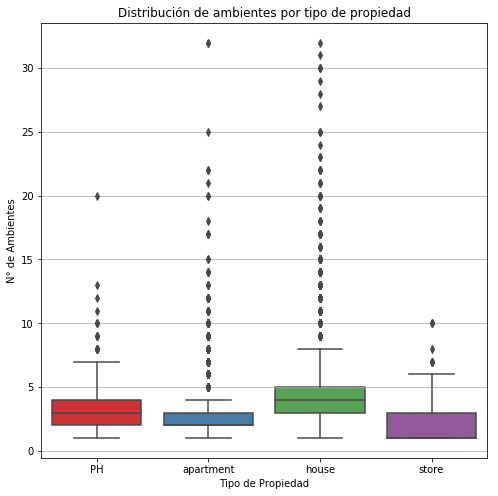

In [82]:
plt.figure(figsize=(8,8))
plt.grid(True)  
ax = sns.boxplot(x="property_type", y="rooms", data=data, palette="Set1")
plt.title('Distribución de ambientes por tipo de propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('N° de Ambientes')

## Verificar outliers para house

In [83]:
data.loc[data['property_type']=='house','rooms'].value_counts(dropna=False)

NaN      27129
 4.0      3271
 3.0      3216
 5.0      2291
 2.0       991
 6.0       986
 7.0       562
 8.0       309
 1.0       260
 10.0      189
 9.0       143
 11.0       62
 12.0       52
 13.0       29
 15.0       24
 14.0       22
 17.0       13
 16.0       11
 20.0        8
 22.0        6
 18.0        5
 30.0        4
 19.0        4
 21.0        4
 25.0        3
 23.0        2
 32.0        1
 27.0        1
 31.0        1
 24.0        1
 28.0        1
 29.0        1
Name: rooms, dtype: int64

In [84]:
iqr_values_house=calculate_iqr_values(data.loc[(data['rooms'].notnull())&(data['property_type']=='house'),'rooms'])
print(data.loc[(data['property_type']=='house')&(data['rooms'].notnull()),'rooms'].apply(check_outliers,args=iqr_values_house).unique())
print(iqr_values_house)

[ 5.  6.  2.  3.  4.  7. nan  8.  1.]
(0.0, 8.0)


In [85]:
#data.loc[(data['property_type']=='house')&(data['rooms']>iqr_values_house[1]),['rooms','description']].sample(10).values
data.loc[(data['property_type']=='house')&(data['rooms']>iqr_values_house[1]),'rooms']=np.nan
data.loc[data['property_type']=='house','rooms'].value_counts(dropna=False)

NaN     27716
 4.0     3271
 3.0     3216
 5.0     2291
 2.0      991
 6.0      986
 7.0      562
 8.0      309
 1.0      260
Name: rooms, dtype: int64

## Búsqueda de ambientes para house

In [86]:
data['clean_amb']=data['rooms']
data['temp_amb']=np.nan

func_lst = [mono_amb_search,more_amb_search,text_amb_search,dorm_search,text_dorm_search,dorm_search2]
for func in func_lst:
#     print(func.__name__)
#     print(data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func).value_counts()
# )
    clean_temp_col(data,'temp_amb')
    data.loc[(data['property_type']=='house')&(data['rooms'].isna()),'temp_amb']=data.loc[(data['property_type']=='house')&(data['rooms'].isna())]['description'].apply(func)
    data.loc[data['property_type']=='house','temp_amb'] = data.loc[data['property_type']=='house','temp_amb'].apply(check_outliers,args=(1,iqr_values_house[1]))
    data.loc[(data['property_type']=='house')&(data['clean_amb'].isna()),'clean_amb']=data.loc[(data['property_type']=='house')&(data['clean_amb'].isna()),'clean_amb'].add(data.loc[data['property_type']=='house','temp_amb'],fill_value=0)

data.loc[(data['property_type']=='house')&(data['rooms'].isna()),'rooms'] = data[(data['property_type']=='house')&(data['rooms'].isna())]['rooms'].add(data[data['property_type']=='house']['clean_amb'],fill_value=0)
#data.loc[(data['property_type']=='store')&(data['clean_fl']).notnull()]    
data.loc[(data['property_type']=='house')]['rooms'].value_counts(dropna=False,sort=True)

 3.0    12043
 4.0    10889
 5.0     4834
NaN      4446
 2.0     3953
 6.0     1562
 1.0      823
 7.0      716
 8.0      336
Name: rooms, dtype: int64

## Verificar outliers para PH

In [87]:
data.loc[data['property_type']=='PH','rooms'].value_counts(dropna=False)

NaN      2496
 3.0     1286
 2.0      742
 4.0      690
 5.0      263
 1.0      118
 6.0       68
 7.0       24
 8.0        9
 9.0        5
 10.0       4
 13.0       1
 20.0       1
 11.0       1
 12.0       1
Name: rooms, dtype: int64

In [88]:
iqr_values_PH=calculate_iqr_values(data.loc[(data['rooms'].notnull())&(data['property_type']=='PH'),'rooms'])
print(data.loc[(data['property_type']=='PH')&(data['rooms'].notnull()),'rooms'].apply(check_outliers,args=iqr_values_PH).unique())
print(iqr_values_PH)

[ 4.  6.  2.  3.  1. nan  5.  7.]
(-1.0, 7.0)


Luego de revisar los outliers de los ambientes de los PH y sus descripciones, se notó que todos salvo el de 20 son correctos.

In [89]:
#data.loc[(data['property_type']=='house')&(data['rooms']>iqr_values_house[1]),['rooms','description']].sample(10).values
data.loc[(data['property_type']=='PH')&(data['rooms']>iqr_values_PH[1]),'rooms']=np.nan
data.loc[data['property_type']=='PH','rooms'].value_counts(dropna=False)

NaN     2518
 3.0    1286
 2.0     742
 4.0     690
 5.0     263
 1.0     118
 6.0      68
 7.0      24
Name: rooms, dtype: int64

## Búsqueda de ambientes para PH

In [90]:
data['clean_amb']=data['rooms']
data['temp_amb']=np.nan

func_lst = [mono_amb_search,more_amb_search,text_amb_search,dorm_search,text_dorm_search,dorm_search2]
for func in func_lst:
#     print(func.__name__)
#     print(data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func).value_counts()
# )
    clean_temp_col(data,'temp_amb')
    data.loc[(data['property_type']=='PH')&(data['rooms'].isna()),'temp_amb']=data.loc[(data['property_type']=='PH')&(data['rooms'].isna())]['description'].apply(func)
    data.loc[data['property_type']=='PH','temp_amb'] = data.loc[data['property_type']=='PH','temp_amb'].apply(check_outliers,args=iqr_values_PH)
    data.loc[(data['property_type']=='PH')&(data['clean_amb'].isna()),'clean_amb']=data.loc[(data['property_type']=='PH')&(data['clean_amb'].isna()),'clean_amb'].add(data.loc[data['property_type']=='PH','temp_amb'],fill_value=0)

data.loc[(data['property_type']=='PH')&(data['rooms'].isna()),'rooms'] = data[(data['property_type']=='PH')&(data['rooms'].isna())]['rooms'].add(data[data['property_type']=='PH']['clean_amb'],fill_value=0)
#data.loc[(data['property_type']=='store')&(data['clean_fl']).notnull()]    
data.loc[(data['property_type']=='PH')]['rooms'].value_counts(dropna=False,sort=True)

 3.0    2331
 4.0    1141
 2.0    1136
NaN      450
 5.0     343
 1.0     187
 6.0      91
 7.0      30
Name: rooms, dtype: int64

In [91]:
#data.loc[(data['property_type']=='PH')&(data['rooms'].isna()),'description'].sample(10).values

## Verificar outliers para store

In [92]:
data.loc[data['property_type']=='store','rooms'].value_counts(dropna=False)

NaN      3984
 1.0       55
 2.0       17
 3.0       13
 7.0        6
 5.0        4
 4.0        4
 10.0       3
 6.0        2
 8.0        1
Name: rooms, dtype: int64

In [93]:
iqr_values_store=calculate_iqr_values(data.loc[(data['rooms'].notnull())&(data['property_type']=='store'),'rooms'])
print(data.loc[(data['property_type']=='store')&(data['rooms'].notnull()),'rooms'].apply(check_outliers,args=iqr_values_store).unique())
print(iqr_values_store)

[ 1. nan  2.  3.  6.  4.  5.]
(-2.0, 6.0)


In [94]:
#data.loc[(data['property_type']=='store')&(data['rooms']>iqr_values_store[1]),['rooms','description']].values

In [95]:
data.loc[(data['property_type']=='store')&(data['rooms']>iqr_values_store[1]),'rooms']=np.nan
data.loc[data['property_type']=='store','rooms'].value_counts(dropna=False)

NaN     3994
 1.0      55
 2.0      17
 3.0      13
 5.0       4
 4.0       4
 6.0       2
Name: rooms, dtype: int64

## Búsqueda de ambientes para store

In [96]:
data['clean_amb']=data['rooms']
data['temp_amb']=np.nan

func_lst = [mono_amb_search,more_amb_search,text_amb_search,dorm_search,text_dorm_search,dorm_search2]
for func in func_lst:
#     print(func.__name__)
#     print(data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func).value_counts()
# )
    clean_temp_col(data,'temp_amb')
    data.loc[(data['property_type']=='store')&(data['rooms'].isna()),'temp_amb']=data.loc[(data['property_type']=='store')&(data['rooms'].isna())]['description'].apply(func)
    data.loc[data['property_type']=='store','temp_amb'] = data.loc[data['property_type']=='store','temp_amb'].apply(check_outliers,args=iqr_values_store)
    data.loc[(data['property_type']=='store')&(data['clean_amb'].isna()),'clean_amb']=data.loc[(data['property_type']=='store')&(data['clean_amb'].isna()),'clean_amb'].add(data.loc[data['property_type']=='store','temp_amb'],fill_value=0)

data.loc[(data['property_type']=='store')&(data['rooms'].isna()),'rooms'] = data[(data['property_type']=='store')&(data['rooms'].isna())]['rooms'].add(data[data['property_type']=='PH']['clean_amb'],fill_value=0)
#data.loc[(data['property_type']=='store')&(data['clean_fl']).notnull()]    
data.loc[(data['property_type']=='store')&(data['rooms'].isna())&(data['surface_total_in_m2']<50),'rooms']=1
data.loc[(data['property_type']=='store')]['rooms'].value_counts(dropna=False,sort=True)

NaN     3459
 1.0     590
 2.0      17
 3.0      13
 5.0       4
 4.0       4
 6.0       2
Name: rooms, dtype: int64

## Verificar outliers para apartment

In [97]:
data.loc[data['property_type']=='apartment','rooms'].value_counts(dropna=False)

NaN      39564
 2.0     10624
 3.0      7909
 1.0      6920
 4.0      3849
 5.0      1160
 6.0       329
 7.0       174
 8.0        86
 9.0        33
 10.0       21
 12.0       12
 11.0        9
 14.0        5
 17.0        3
 13.0        3
 20.0        2
 32.0        2
 22.0        2
 15.0        2
 18.0        1
 25.0        1
 21.0        1
Name: rooms, dtype: int64

In [98]:
iqr_values_apartment=calculate_iqr_values(data.loc[(data['rooms'].notnull())&(data['property_type']=='apartment'),'rooms'])
print(data.loc[(data['property_type']=='apartment')&(data['rooms'].notnull()),'rooms'].apply(check_outliers,args=iqr_values_apartment).unique())
print(iqr_values_apartment)

[ 1.  3.  4.  2. nan]
(0.5, 4.5)


In [99]:
#data.loc[(data['property_type']=='apartment')&(data['rooms']==iqr_values_apartment[1]+3),['rooms','description']].sample(10).values

Luego de revisar los outliers de los ambientes de los apartment y sus descripciones, se decidió tomar como válidos a todos los que aparecen hasta 7 ambientes. Esto es debido a que existe una buena cantidad de publicaciones donde se venden varias propiedades juntas o departamentos de varios pisos.

In [100]:
#data.loc[(data['property_type']=='apartment')&(data['rooms']>iqr_values_apartment[1]),['rooms','description']].sample(10).values
data.loc[(data['property_type']=='apartment')&(data['rooms']>7),'rooms']=np.nan
data.loc[data['property_type']=='apartment','rooms'].value_counts(dropna=False)

NaN     39747
 2.0    10624
 3.0     7909
 1.0     6920
 4.0     3849
 5.0     1160
 6.0      329
 7.0      174
Name: rooms, dtype: int64

## Búsqueda de ambientes para apartment

In [101]:
print(iqr_values_apartment)

(0.5, 4.5)


In [102]:
data['clean_amb']=data['rooms']
data['temp_amb']=np.nan

func_lst = [mono_amb_search,more_amb_search,text_amb_search,dorm_search,text_dorm_search,dorm_search2]
for func in func_lst:
#     print(func.__name__)
#     print(data.loc[(data['property_type']=='store')&(data['floor'].isna())]['description'].apply(func).value_counts()
# )
    clean_temp_col(data,'temp_amb')
    data.loc[(data['property_type']=='apartment')&(data['rooms'].isna()),'temp_amb']=data.loc[(data['property_type']=='apartment')&(data['rooms'].isna())]['description'].apply(func)
    data.loc[data['property_type']=='apartment','temp_amb'] = data.loc[data['property_type']=='apartment','temp_amb'].apply(check_outliers,args=(iqr_values_apartment[0],iqr_values_apartment[1]+2.5))
    data.loc[(data['property_type']=='apartment')&(data['clean_amb'].isna()),'clean_amb']=data.loc[(data['property_type']=='apartment')&(data['clean_amb'].isna()),'clean_amb'].add(data.loc[data['property_type']=='apartment','temp_amb'],fill_value=0)

data.loc[(data['property_type']=='apartment')&(data['rooms'].isna()),'rooms'] = data[(data['property_type']=='apartment')&(data['rooms'].isna())]['rooms'].add(data[data['property_type']=='apartment']['clean_amb'],fill_value=0)
#data.loc[(data['property_type']=='store')&(data['clean_fl']).notnull()]    
data.loc[(data['property_type']=='apartment')]['rooms'].value_counts(dropna=False,sort=True)

 2.0    21096
 3.0    17401
 1.0    12933
NaN      9021
 4.0     7931
 5.0     1735
 6.0      398
 7.0      197
Name: rooms, dtype: int64

In [103]:
#data.loc[(data['property_type']=='PH')&(data['rooms'].isna()),'description'].sample(10).values

In [104]:
data.drop(['clean_amb','temp_amb'],axis=1,inplace=True)
data.isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18545
lat-lon                        50954
lat                            50954
lon                            50954
price                          20281
currency                       20282
price_aprox_local_currency     20281
price_aprox_usd                20282
surface_total_in_m2            39709
surface_covered_in_m2          19908
price_usd_per_m2               52472
price_per_m2                   33432
floor                            804
rooms                          17376
expenses                      105910
properati_url                      0
description                        0
title                              0
image_thumbnail                 3087
dtype: int64

Text(0, 0.5, 'N° de Ambientes')

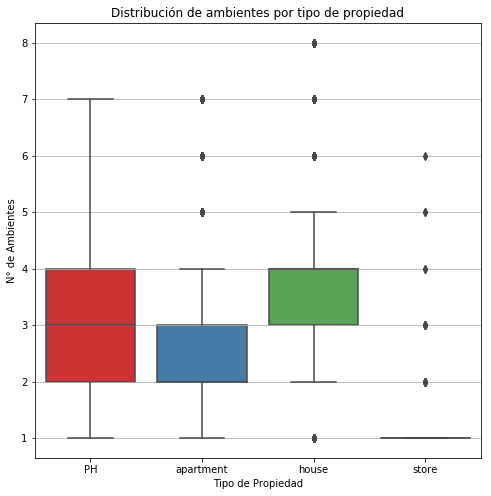

In [105]:
plt.figure(figsize=(8,8))
plt.grid(True)  
ax = sns.boxplot(x="property_type", y="rooms", data=data, palette="Set1")
plt.title('Distribución de ambientes por tipo de propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('N° de Ambientes')

# Variables Dummy: Amenities

Se busca crear variables dummy de características que sumen para la regresión del desafío 2.

In [106]:
sin_cochera = data.loc[:,'description'].str.contains(r"(?:sin cochera|sin estacionamiento|sin garage)",flags=re.IGNORECASE,regex=True)
sin_cochera = sin_cochera.apply(lambda x: 0 if x else np.nan)

cochera = data.loc[sin_cochera.isna(),'description'].str.contains(r"(?:cochera|estacionamiento|garage)",flags=re.IGNORECASE,regex=True).astype(float)
cochera = cochera.add(sin_cochera,fill_value=0)

sin_gimnasio = data.loc[:,'description'].str.contains(r"(?:sin gym|sin gimnasio|sin gimnasia)",flags=re.IGNORECASE,regex=True)
sin_gimnasio = sin_gimnasio.apply(lambda x: 0 if x else np.nan)

gimnasio = data.loc[:,'description'].str.contains(r"(?:gym|gimnasio|gimnasia)",flags=re.IGNORECASE,regex=True).astype(float)
gimnasio = gimnasio.add(sin_gimnasio,fill_value=0)

sin_piscina = data.loc[:,'description'].str.contains(r"(?:sin piscina|sin pisicina|sin pileta)",flags=re.IGNORECASE,regex=True)
sin_piscina = sin_piscina.apply(lambda x: 0 if x else np.nan)

piscina = data.loc[:,'description'].str.contains(r"(?:piscina|pisicina|pileta)",flags=re.IGNORECASE,regex=True).astype(float)
piscina = piscina.add(sin_piscina,fill_value=0)

sin_sum = data.loc[:,'description'].str.contains(r"(?:sin SUM|sin salón|sin salon|sin playroom)",flags=re.IGNORECASE,regex=True)
sin_sum = sin_sum.apply(lambda x: 0 if x else np.nan)

SUM = data.loc[:,'description'].str.contains(r"(?:SUM|salón|salon|playroom)",flags=re.IGNORECASE,regex=True).astype(float)
SUM = SUM.add(sin_gimnasio,fill_value=0)

sin_laundry = data.loc[:,'description'].str.contains(r"(?:sin laundy|sin laundry|sin lavadero)",flags=re.IGNORECASE,regex=True)
sin_laundry = sin_laundry.apply(lambda x: 0 if x else np.nan)

laundry = data.loc[:,'description'].str.contains(r"(?:laundy|laundry|lavadero)",flags=re.IGNORECASE,regex=True).astype(float)
laundry = laundry.add(sin_gimnasio,fill_value=0)

sin_balcon = data.loc[:,'description'].str.contains(r"(?:sin balcon|sin balcón)",flags=re.IGNORECASE,regex=True)
sin_balcon = sin_balcon.apply(lambda x: 0 if x else np.nan)

balcon = data.loc[:,'description'].str.contains(r"(?:balcon|balcón)",flags=re.IGNORECASE,regex=True).astype(float)
balcon = balcon.add(sin_gimnasio,fill_value=0)

sin_patio = data.loc[:,'description'].str.contains(r"(?:sin patio|sin jardín|sin jardin)",flags=re.IGNORECASE,regex=True)
sin_patio = sin_patio.apply(lambda x: 0 if x else np.nan)

patio = data.loc[:,'description'].str.contains(r"(?:patio|jardín|jardin)",flags=re.IGNORECASE,regex=True).astype(float)
patio = patio.add(sin_gimnasio,fill_value=0)

amenities = {
    'cochera':cochera,
    'gimnasio':gimnasio,
    'piscina':piscina,
    'SUM':SUM,
    'laundry':laundry,
    'balcon':balcon,
    'patio':patio,
}

for key,item in amenities.items():
    data[key]=item
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'cochera', 'gimnasio',
       'piscina', 'SUM', 'laundry', 'balcon', 'patio'],
      dtype='object')

In [107]:
data.isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18545
lat-lon                        50954
lat                            50954
lon                            50954
price                          20281
currency                       20282
price_aprox_local_currency     20281
price_aprox_usd                20282
surface_total_in_m2            39709
surface_covered_in_m2          19908
price_usd_per_m2               52472
price_per_m2                   33432
floor                            804
rooms                          17376
expenses                      105910
properati_url                      0
description                        0
title                              0
image_thumbnail                 3087
cochera                            0
gimnasio                           0
p

# Limpieza de Superficie (Total y Cubierta)

De las inspecciónes de la columnas "surface_total_in_m2" y "surface_covered_in_m2", vemos que los valores comienzan desde el 0.0, por ende consideraremos superficies validas aquellas que sean igual o superen los diez metros cuadrados.

In [108]:
min_sup_valida = 10
data.loc[data['surface_total_in_m2']<min_sup_valida,'surface_total_in_m2']=np.nan
data.loc[data['surface_covered_in_m2']<min_sup_valida,'surface_total_in_m2']=np.nan

La mediana de las superficies por la cantidad de ambientes. En los casos de 1 y 2 ambientes parece lógico. 

In [109]:
apartment_df = data.groupby('property_type').get_group('apartment')

apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()
data.loc[(data['property_type']=='apartment'),'surface_total_in_m2'].isna().sum()

20295

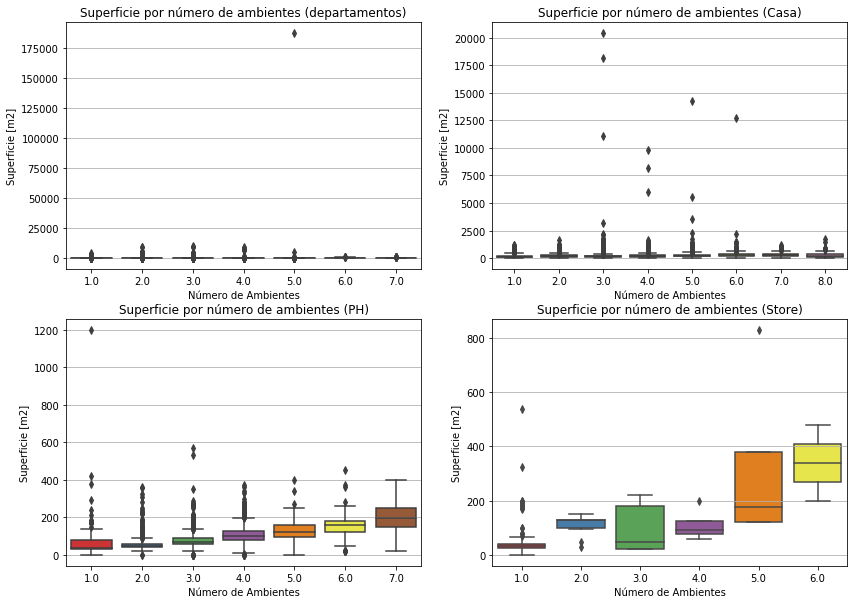

In [110]:
apartment_df = data.loc[data['property_type']=='apartment'].copy()
house_df = data.loc[data['property_type']=='house'].copy()
ph_df = data.loc[data['property_type']=='PH'].copy()
store_df = data.loc[data['property_type']=='store'].copy()

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=apartment_df, palette="Set1")
plt.title('Superficie por número de ambientes (departamentos)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(222)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=house_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=house_df, palette="Set1")
plt.title('Superficie por número de ambientes (Casa)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(223)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=ph_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=ph_df, palette="Set1")
plt.title('Superficie por número de ambientes (PH)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(224)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=store_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=store_df, palette="Set1")
plt.title('Superficie por número de ambientes (Store)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')
plt.savefig("../Images/Rooms-Before.png")

## Limpiando Superficies 

### apartment

In [111]:
sup_tot_limits_apt = []
sup_cub_limits_apt = []
for i in range(1,8,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='apartment')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_apt.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='apartment')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_apt.append((10,b))
print(sup_tot_limits_apt)
print(sup_cub_limits_apt)

for i in range(7):
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']>sup_tot_limits_apt[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']>sup_cub_limits_apt[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_total_in_m2']<sup_tot_limits_apt[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='apartment')&(data['surface_covered_in_m2']<sup_cub_limits_apt[i][0]),'surface_covered_in_m2']=np.nan
apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 64.5), (10, 89.0), (10, 154.0), (10, 252.0), (10, 410.0), (10, 531.75), (10, 537.5)]
[(10, 55.0), (10, 75.0), (10, 124.0), (10, 210.0), (10, 361.25), (10, 502.625), (10, 477.5)]


,surface_total_in_m2,surface_covered_in_m2
rooms,,
1.0,37.0,34.0
2.0,51.0,46.0
3.0,78.0,70.0
4.0,110.0,100.0
5.0,175.0,148.0
6.0,214.0,192.0
7.0,233.0,215.0


### house

In [112]:
sup_tot_limits_hs = []
sup_cub_limits_hs = []
for i in range(1,8,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='house')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_hs.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='house')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_hs.append((10,b))
print(sup_tot_limits_hs)
print(sup_cub_limits_hs)

for i in range(7):
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']>sup_tot_limits_hs[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']>sup_cub_limits_hs[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_total_in_m2']<sup_tot_limits_hs[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='house')&(data['surface_covered_in_m2']<sup_cub_limits_hs[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 945.0), (10, 900.0), (10, 827.5), (10, 880.0), (10, 1126.5), (10, 1365.0), (10, 1561.0)]
[(10, 462.5), (10, 465.0), (10, 400.0), (10, 428.5), (10, 521.875), (10, 612.875), (10, 683.75)]


### PH

In [113]:
sup_tot_limits_ph = []
sup_cub_limits_ph = []
for i in range(1,6,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='PH')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_ph.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='PH')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_ph.append((10,b))
print(sup_tot_limits_ph)
print(sup_cub_limits_ph)

for i in range(5):
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']>sup_tot_limits_ph[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']>sup_cub_limits_ph[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_total_in_m2']<sup_tot_limits_ph[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='PH')&(data['surface_covered_in_m2']<sup_cub_limits_ph[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 224.0), (10, 109.5), (10, 198.0), (10, 294.375), (10, 372.75)]
[(10, 147.125), (10, 90.0), (10, 138.0), (10, 197.5), (10, 257.5)]


### store

In [114]:
sup_tot_limits_str = []
sup_cub_limits_str = []
for i in range(1,5,1):
    a=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='store')&(data['surface_total_in_m2'].notnull()),'surface_total_in_m2'])[1]
    sup_tot_limits_str.append((10,a))
    b=calculate_iqr_values(data.loc[(data['rooms']==i)&(data['property_type']=='store')&(data['surface_covered_in_m2'].notnull()),'surface_covered_in_m2'])[1]
    sup_cub_limits_str.append((10,b))
print(sup_tot_limits_str)
print(sup_cub_limits_str)

for i in range(4):
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']>sup_tot_limits_str[i][1]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']>sup_cub_limits_str[i][1]),'surface_covered_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_total_in_m2']<sup_tot_limits_str[i][0]),'surface_total_in_m2']=np.nan
    data.loc[(data['property_type']=='store')&(data['surface_covered_in_m2']<sup_cub_limits_str[i][0]),'surface_covered_in_m2']=np.nan
#apartment_df[['rooms','surface_total_in_m2','surface_covered_in_m2']].groupby('rooms').median()

[(10, 67.5), (10, 295.0), (10, 3128.375), (10, 356.0)]
[(10, 65.0), (10, 177.25), (10, 424.25), (10, 198.125)]


Me armo un dataframe con los datos de apartment y en cada fila la superficie segun número de ambientes.

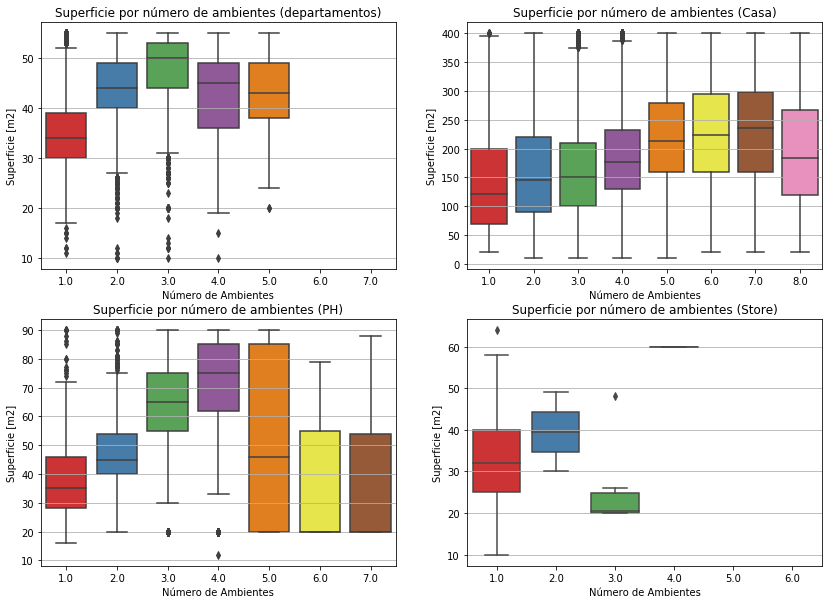

In [115]:
apartment_df = data.loc[data['property_type']=='apartment'].copy()
house_df = data.loc[data['property_type']=='house'].copy()
ph_df = data.loc[data['property_type']=='PH'].copy()
store_df = data.loc[data['property_type']=='store'].copy()

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=apartment_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=apartment_df, palette="Set1")
plt.title('Superficie por número de ambientes (departamentos)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(222)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=house_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=house_df, palette="Set1")
plt.title('Superficie por número de ambientes (Casa)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(223)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=ph_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=ph_df, palette="Set1")
plt.title('Superficie por número de ambientes (PH)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')

plt.subplot(224)
plt.grid(True)  
#ax = sns.boxplot(x="rooms", y="surface_total_in_m2", data=store_df, palette="Set1")
ax = sns.boxplot(x="rooms", y="surface_covered_in_m2", data=store_df, palette="Set1")
plt.title('Superficie por número de ambientes (Store)')
plt.xlabel('Número de Ambientes')
plt.ylabel('Superficie [m2]')
plt.savefig("../Images/Rooms-After.png")

## Funciones para búsqueda de superficie

In [116]:
def sup_total_search(text):
    pattern = r'(?:lote de|sup\.\s?total|superficie total|sup\.\s?tot\.)\s?:?\s*(\d+[,|\.]?\d*)\s?(?:m2|mts2|mtrs2|metros\s?cuadrados|m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_tot_lst = regex.findall(text)
    
    if not sup_tot_lst:
        return np.nan
    if len(sup_tot_lst)!=1:
        return np.nan
    sup=pd.to_numeric(sup_tot_lst[0].replace(',','.'))
    if sup<10:
        return np.nan
    return sup
def sup_total_search2(text):
    pattern = r'(\d+[,|\.]?\d*)\s?(?:m2|mts2|mtrs2|metros\s?cuadrados|m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_tot_lst = regex.findall(text)
    
    if not sup_tot_lst:
        return np.nan
    if len(sup_tot_lst)>1:
        sup_lst = [pd.to_numeric(item.replace(',','.')) for item in sup_tot_lst]
        if not sup_lst:
            return np.nan
        elif len(sup_lst)>1:
            return np.nan
        elif sup_lst<10:
            return np.nan
        else:
            return sup_lst[0]
        
    if len(sup_tot_lst)==1:
        return pd.to_numeric(sup_tot_lst[0].replace(',','.'))

def sup_cub_search(text):
    pattern = r'(?:superficie\s?cubierta:?|sup\.?\s?cub.?:?|sub\.?\s?cubierta:?|metros.\s?cubiertos:?|cub\.?)\s?:?\s?(\d+,?\.?\d*)\s?(?:m2|mt2|mtrs2|mtrs\.?|mts\.?||m²)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_cub_lst = regex.findall(text)
    if not sup_cub_lst:
        return np.nan
    sup_cub_lst = [item.replace(',','.') for item in sup_cub_lst]
    if len(sup_cub_lst)==1:
        sup=pd.to_numeric(sup_cub_lst[0])
        if sup<10:
            return np.nan
        else:
            return sup
    else:
        return np.nan
        #return(max(pd.to_numeric(sup_cub_lst)))

def sup_cub_search2(text):
    pattern = r'(\d+,?\.?\d*)\s?(?:m2|mtrs2|mtrs\.?|mts\.?|m²|metros|metros\s?cuadrados|metros\s?cuadrados\s?de|),?\s?(?:construidos|cubiertos|cub\.?)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    sup_cub_lst = regex.findall(text)
    if not sup_cub_lst:
        return np.nan
    sup_cub_lst = [item.replace(',','.') for item in sup_cub_lst]
    if len(sup_cub_lst)==1:
        sup=pd.to_numeric(sup_cub_lst[0])
        if sup<10:
            return np.nan
        else:
            return sup
    else:
        return np.nan
        #return(max(pd.to_numeric(sup_cub_lst)))
    

## Columnas temporales

Columnas temporales:

temp_amb: columna para obtener el resultado del apply de alguna función con RegEx. Puede usarse sobre 'title' o 'description'. empieza en np.nan

clean_amb: columna para ir acumulando los resultados de cada función con RegEx. Puede usarse sobre 'title' o 'description'. empieza inicializada con los valores originales de 'rooms'.

In [117]:
#Columnas temporales para superficie cubierta
data['clean_sup_cub']=data['surface_covered_in_m2']
data['temp_sup_cub']=np.nan

#Columnas temporales para superficie total
data['clean_sup_tot']=data['surface_total_in_m2']
data['temp_sup_tot']=np.nan

## Búsqueda de superficie cubierta

In [118]:
#data['description'] = data['description'].fillna("-")
sup_cub_func_lst = [sup_cub_search,sup_cub_search2]
col_lst = ['title','description']
for col in col_lst:
    print("------------------------")
    print("Columna: {}".format(col))
    print("------------------------")
    for func in sup_cub_func_lst:
        clean_temp_col(data,'temp_sup_cub')
        data.loc[data['clean_sup_cub'].isna(),'temp_sup_cub'] = data[data['clean_sup_cub'].isna()][col].apply(func)
        data.loc[data['clean_sup_cub'].isna(),'clean_sup_cub'] = data['clean_sup_cub'].add(data['temp_sup_cub'],fill_value=0)
        print(func.__name__)
        new_found(data,'temp_sup_cub','clean_sup_cub')

------------------------
Columna: title
------------------------
sup_cub_search
Nuevos: 0.
Total: 67098.
sup_cub_search2
Nuevos: 78.
Total: 67176.
------------------------
Columna: description
------------------------
sup_cub_search
Nuevos: 994.
Total: 68170.
sup_cub_search2
Nuevos: 2303.
Total: 70473.


## Búsqueda de superficie total

In [119]:
sup_tot_func_lst = [sup_total_search,sup_total_search2]
col_lst = ['title','description']
for col in col_lst:
    print("------------------------")
    print("Columna: {}".format(col))
    print("------------------------")
    for func in sup_tot_func_lst:
        clean_temp_col(data,'temp_sup_tot')
        data.loc[data['clean_sup_tot'].isna(),'temp_sup_tot'] = data[data['clean_sup_tot'].isna()][col].apply(func)
        data.loc[data['clean_sup_tot'].isna(),'clean_sup_tot'] = data['clean_sup_tot'].add(data['temp_sup_tot'],fill_value=0)
        print(func.__name__)
        new_found(data,'temp_sup_tot','clean_sup_tot')

------------------------
Columna: title
------------------------
sup_total_search
Nuevos: 47.
Total: 52208.
sup_total_search2
Nuevos: 3054.
Total: 55262.
------------------------
Columna: description
------------------------
sup_total_search
Nuevos: 1605.
Total: 56867.
sup_total_search2
Nuevos: 8889.
Total: 65756.


Filtrar los nuevos valores con los outliers de antes.

In [120]:
sup_tot_limits = [sup_tot_limits_apt,sup_tot_limits_hs,sup_tot_limits_ph,sup_tot_limits_str]
sup_cub_limits = [sup_cub_limits_apt,sup_cub_limits_hs,sup_cub_limits_ph,sup_cub_limits_str]
property_type = ('apartment','house','PH','store')

In [121]:
for tipo,limites_tot,limites_cub in zip(property_type,sup_tot_limits,sup_cub_limits):
    print(tipo,limites_tot,limites_cub)

apartment [(10, 64.5), (10, 89.0), (10, 154.0), (10, 252.0), (10, 410.0), (10, 531.75), (10, 537.5)] [(10, 55.0), (10, 75.0), (10, 124.0), (10, 210.0), (10, 361.25), (10, 502.625), (10, 477.5)]
house [(10, 945.0), (10, 900.0), (10, 827.5), (10, 880.0), (10, 1126.5), (10, 1365.0), (10, 1561.0)] [(10, 462.5), (10, 465.0), (10, 400.0), (10, 428.5), (10, 521.875), (10, 612.875), (10, 683.75)]
PH [(10, 224.0), (10, 109.5), (10, 198.0), (10, 294.375), (10, 372.75)] [(10, 147.125), (10, 90.0), (10, 138.0), (10, 197.5), (10, 257.5)]
store [(10, 67.5), (10, 295.0), (10, 3128.375), (10, 356.0)] [(10, 65.0), (10, 177.25), (10, 424.25), (10, 198.125)]


In [122]:
data['surface_total_in_m2'] = data['clean_sup_tot']
data['surface_covered_in_m2'] = data['clean_sup_cub']

data.drop(['clean_sup_tot','temp_sup_tot','clean_sup_cub','temp_sup_cub'],axis=1,inplace=True)

In [123]:
for tipo,limites_tot,limites_cub in zip(property_type,sup_tot_limits,sup_cub_limits):
    for i in range(len(limites_tot)):       
        data.loc[(data['property_type']==str(tipo))&(data['surface_total_in_m2']>limites_tot[i][1]),'surface_total_in_m2']=np.nan
        data.loc[(data['property_type']==str(tipo))&(data['surface_covered_in_m2']>limites_cub[i][1]),'surface_covered_in_m2']=np.nan
        data.loc[(data['property_type']==str(tipo))&(data['surface_total_in_m2']<limites_tot[i][0]),'surface_total_in_m2']=np.nan
        data.loc[(data['property_type']==str(tipo))&(data['surface_covered_in_m2']<limites_cub[i][0]),'surface_covered_in_m2']=np.nan

In [124]:
#data.to_csv('../Data/falta_sup_price.csv')

## Imputación de superficies

Se calcula el índice de construcción por zona y por tipo de propiedad.

El índice se define como:

<center>$Indice\ de\ Construcción = \frac{Superficie Cubierta}{Superficie Total}$</center>

Luego, se calcula los valores faltantes de Superficie Cubierta multiplicando al índice por la Superficie Total.
Y, la Superficie Total como la Superficie Cubierta dividido el Indice

In [125]:
data['construction_index']=data['surface_covered_in_m2']/data['surface_total_in_m2']
place_const_index = data[['property_type','place_name','construction_index']].groupby(['place_name','property_type']).mean()
data.drop('construction_index',axis=1,inplace=True)

data = pd.merge(data,place_const_index,on=['place_name','property_type'],how='inner')

falta_sup_cub_index = data.loc[data['construction_index'].notnull()&(data['surface_covered_in_m2'].isna())&(data['surface_total_in_m2'].notnull()),['surface_covered_in_m2','surface_total_in_m2','construction_index']].index
data.loc[falta_sup_cub_index,'surface_covered_in_m2'] = data.loc[falta_sup_cub_index,'construction_index']*data.loc[falta_sup_cub_index,'surface_total_in_m2']

falta_sup_tot_index = data.loc[data['construction_index'].notnull()&(data['surface_covered_in_m2'].notnull())&(data['surface_total_in_m2'].isna()),['surface_covered_in_m2','surface_total_in_m2','construction_index']].index
data.loc[falta_sup_tot_index,'surface_total_in_m2'] = data.loc[falta_sup_tot_index,'surface_covered_in_m2']/data.loc[falta_sup_tot_index,'construction_index']

In [126]:
data.isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18545
lat-lon                        50954
lat                            50954
lon                            50954
price                          20281
currency                       20282
price_aprox_local_currency     20281
price_aprox_usd                20282
surface_total_in_m2            43054
surface_covered_in_m2          42826
price_usd_per_m2               52472
price_per_m2                   33432
floor                            804
rooms                          17376
expenses                      105910
properati_url                      0
description                        0
title                              0
image_thumbnail                 3087
cochera                            0
gimnasio                           0
p

# ANÁLISIS  DE LAS DIFERENTES COTIZACIONES

En primer lugar evaluamos las diferentes monedas que existen en el dataset. 

In [127]:
data['currency'].value_counts()

USD    86697
ARS    13130
PEN        2
UYU        1
Name: currency, dtype: int64

de la inspección de la columna "currency", podemos ver que salvo 3 registros, toda la información está cotizada en 
Pesos Argentinos o Dólares. La decisión será chequear si esos 3 registros se tratan de errores de imputación y corregir o 
convertir los mismos a dólares para manejar una sola divisa de cambio.
La elección se basa además en la descripción del dataset recibido ya que en "currency" sólo contempla la moneda ARS y DOL.

#### Chequeamos Tipos de Cambio presentes en el Dataset

#### Valores con currency ARS

In [128]:
((data.loc[data['currency']=='ARS','price_aprox_local_currency'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4).value_counts()

17.6445    13130
dtype: int64

In [129]:
((data.loc[data['currency']=='ARS','price'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4).value_counts()

17.8305    12775
17.1430      283
17.6340       54
17.7980        6
17.2040        4
17.5025        3
17.4040        2
17.4265        1
17.4670        1
17.4050        1
dtype: int64

vemos que cuando el aviso es ingresado con currency==ARS están presentes en el dataset dos tipos de cambio :

uno para convertir ARS a USD = TC Comprador
Otro para convertir USD a ARS = TC Vendedor

Definimos las variables

In [130]:
TC_comprador=((data.loc[data['currency']=='ARS','price_aprox_local_currency'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4).value_counts()
TC_comprador

17.6445    13130
dtype: int64

In [131]:
TC_vendedor=((data.loc[data['currency']=='ARS','price'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4).mean()
TC_vendedor

17.8144372048776

#### Valores con currency USD

In [132]:
((data.loc[data['currency']=='USD','price'])==(data.loc[data['currency']=='USD','price_aprox_usd'])).value_counts()


True    86697
dtype: int64

In [133]:
((data.loc[data['currency']=='USD','price_aprox_local_currency'])/(data.loc[data['currency']=='USD','price_aprox_usd'])).round(decimals=4).value_counts()

17.6445    86697
dtype: int64

Para los valores ingresados en dólares 'price' coincide con 'price_aprox_usd'
El tipo de cambio entre 'price_aprox_local_currency' (moneda local, ARS) y el dolar es el ya visto como "TC_comprador"

Hacemos ahora un filtro del registro ingresado con moneda uruguaya (UYU), calculando el tipo de cambio original (columna "price") y revisamos además el correspondiente a la moneda americana

In [134]:
data['currency']=="UYU"
data_UYU= data.loc[data['currency']=="UYU", ["price", "price_aprox_local_currency","price_aprox_usd","place_with_parent_names"]]
data_UYU

data_UYU_TC=data_UYU["price"]/data_UYU['price_aprox_usd']
data_USD_TC=data_UYU["price_aprox_local_currency"]/data_UYU['price_aprox_usd']
print(data_UYU)
print(data_UYU_TC)
print(data_USD_TC)

              price  price_aprox_local_currency  price_aprox_usd  \
116625  650000000.0                4.054773e+08      22980378.29   

              place_with_parent_names  
116625  |Argentina|Mendoza|San Roque|  
116625    28.285
dtype: float64
116625    17.6445
dtype: float64


En este caso vemos que se trata de una propiedad vendida en territorio argentino (provincia de Mendoza), que se ingresó con 3 cotizaciones diferentes. Vamos a depurar la fila, dejando los precios establecidos en ARS ya que Price no coincide con Price_aprox_usd y utiliza TC_comprador

In [135]:
data.loc[data['currency']=="UYU","price"]=data.loc[data['currency']=="UYU","price_aprox_usd"]*TC_vendedor

In [136]:
data['currency']=="UYU"
data_UYU= data.loc[data['currency']=="UYU", ["price", "price_aprox_local_currency","price_aprox_usd","place_with_parent_names"]]
data_UYU

data_UYU_TC=data_UYU["price"]/data_UYU['price_aprox_usd']
data_USD_TC=data_UYU["price_aprox_local_currency"]/data_UYU['price_aprox_usd']
print(data_UYU)
print(data_UYU_TC)
print(data_USD_TC)
print(data_UYU.index)

               price  price_aprox_local_currency  price_aprox_usd  \
116625  4.093825e+08                4.054773e+08      22980378.29   

              place_with_parent_names  
116625  |Argentina|Mendoza|San Roque|  
116625    17.814437
dtype: float64
116625    17.6445
dtype: float64
Int64Index([116625], dtype='int64')


resta sólo cambiar la moneda

In [137]:
data.loc[data['currency']=='UYU', 'currency']="ARS"

chequeamos que el cambio se haya efectuado correctamente

In [138]:
data.iloc[data_UYU.index,:]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,construction_index
116625,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,NaN,...,Casa - San Vicente,https://thumbs4.properati.com/2/pA0RbuDKRK6GgV...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857333


Hacemos el mismo procedimiento con las propiedades cotizadas con moneda peruana ("PEN")

In [139]:
#data['currency']=="PEN"
data_PEN=data.loc[data['currency']=="PEN", ["price", "price_aprox_local_currency","price_aprox_usd","country_name","place_with_parent_names"]]

data_PEN_TC=data_PEN["price"]/data_PEN['price_aprox_usd']
data_USD_TC=data_PEN["price_aprox_local_currency"]/data_PEN['price_aprox_usd']

print(data_PEN)
print(data_PEN_TC)
print(data_USD_TC)

          price  price_aprox_local_currency  price_aprox_usd country_name  \
86677  380000.0                  2066864.90        117139.33    Argentina   
86678  950000.0                  5167162.35        292848.33    Argentina   

           place_with_parent_names  
86677  |Argentina|Capital Federal|  
86678  |Argentina|Capital Federal|  
86677    3.244
86678    3.244
dtype: float64
86677    17.6445
86678    17.6445
dtype: float64


Al igual que en caso anterior, se tratn de propiedades vendidas en CABA, que cuentan con dos tipos de cambio diferentes. 
Se decide unificar a ARS

In [140]:
data.loc[data['currency']=="PEN","price"]=data.loc[data['currency']=="PEN","price_aprox_usd"]*TC_vendedor

In [141]:
data.iloc[data_PEN.index,:]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,title,image_thumbnail,cochera,gimnasio,piscina,SUM,laundry,balcon,patio,construction_index
86677,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/9/N_Qr_5X_vOq--b...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.905939
86678,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905939


In [142]:
data.loc[data['currency']=='PEN', 'currency']="ARS"

Verificamos que se hayan aplicado corréctamente los cambios

In [143]:
data.iloc[data_PEN.index,:][['price', "currency", "price_aprox_local_currency","price_aprox_usd","country_name","place_with_parent_names"]]

,price,currency,price_aprox_local_currency,price_aprox_usd,country_name,place_with_parent_names
86677,2.086771e+06,ARS,2066864.90,117139.33,Argentina,|Argentina|Capital Federal|
86678,5.216928e+06,ARS,5167162.35,292848.33,Argentina,|Argentina|Capital Federal|


## Filtrado y limpieza de OUTLIERS en las Columnas de Precios

## Columna "price_per_m2"

In [144]:
data.loc[(data['currency']=='ARS')&(data['price_per_m2'].notnull()),'price_per_m2'].describe()

count    1.034000e+04
mean     3.350736e+04
std      5.582537e+04
min      5.714286e+01
25%      2.124053e+04
50%      3.027623e+04
75%      3.924729e+04
max      4.000000e+06
Name: price_per_m2, dtype: float64

In [145]:
price_m2_ARS=data.loc[(data['currency']=='ARS')&(data['price_per_m2'].notnull()),'price_per_m2']

print ('La mediana de precios por m2 en pesos es: {0:.2f}'.format(price_m2_ARS.median()),'(registros con currency ARS)')
print ('La media de de precios por m2 en pesos es: {0:.2f}'.format(price_m2_ARS.mean()),'(registros con currency ARS)')
print ('El desvio de precios por m2 en pesos es : {0:.2f}'.format(price_m2_ARS.std()),'(registros con currency ARS)')


La mediana de precios por m2 en pesos es: 30276.23 (registros con currency ARS)
La media de de precios por m2 en pesos es: 33507.36 (registros con currency ARS)
El desvio de precios por m2 en pesos es : 55825.37 (registros con currency ARS)


In [146]:
data.loc[(data['currency']=='USD')&(data['price_per_m2'].notnull()),'price_per_m2'].describe()

count    7.634000e+04
mean     3.353757e+03
std      1.983121e+04
min      3.208556e+00
25%      1.477935e+03
50%      2.052632e+03
75%      2.842577e+03
max      2.600000e+06
Name: price_per_m2, dtype: float64

In [147]:
price_per_m2_USD=data.loc[(data['currency']=='USD')&(data['price_per_m2'].notnull()),'price_per_m2']

print ('La mediana de precios por m2 en dólares es: {0:.2f}'.format(price_m2_ARS.median()),'(registros con currency USD)')
print ('La media de de precios por m2 en dólares es: {0:.2f}'.format(price_m2_ARS.mean()),'(registros con currency USD)')
print ('El desvio de precios por m2 en dólares es: {0:.2f}'.format(price_m2_ARS.std()),'(registros con currency USD)')

La mediana de precios por m2 en dólares es: 30276.23 (registros con currency USD)
La media de de precios por m2 en dólares es: 33507.36 (registros con currency USD)
El desvio de precios por m2 en dólares es: 55825.37 (registros con currency USD)


## Estado Inicial de Outliers

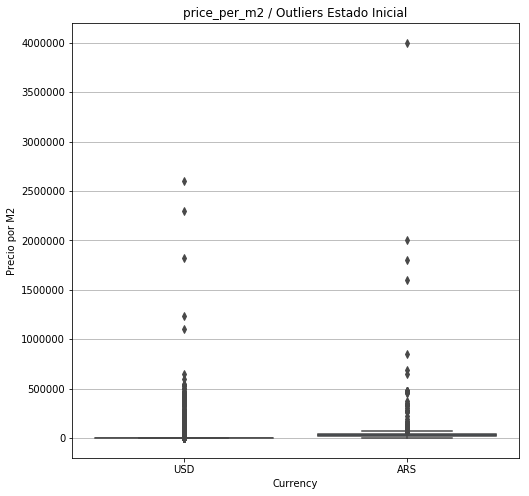

In [148]:
plt.figure(figsize=(8,8))
plt.grid(True)  


ax = sns.boxplot(x="currency", y="price_per_m2", data=data, palette="Set1")
plt.title('price_per_m2 / Outliers Estado Inicial')
plt.xlabel('Currency')
plt.ylabel('Precio por M2');
plt.savefig('../Images/Price_m2_before.png')

## Cálculo de outliers  con currency=ARS

In [149]:
min_price_ARS_per_m2 = 1800
iqr_values_ARS=calculate_iqr_values(data.loc[(data['price_per_m2'].notnull())&(data['currency']=='ARS'),'price_per_m2'])
print(data.loc[(data['currency']=='ARS')&(data['price_per_m2'].notnull()),'price_per_m2'].apply(check_outliers,args=iqr_values_ARS).unique())
print(iqr_values_ARS)
data.loc[(data['currency']=='ARS')&((data['price_per_m2']>iqr_values_ARS[1])|(data['price_per_m2']<min_price_ARS_per_m2)),'price_per_m2']=np.nan

[31016.94915254 32666.66666667 32711.86440678 ...  4666.66666667
  2444.44444444  8965.51724138]
(-5769.608865110535, 66257.42891659836)


## Cálculo de outliers  con currency=USD

In [150]:
min_price_USD_per_m2 = 100
iqr_values_USD=calculate_iqr_values(data.loc[(data['price_per_m2'].notnull())&(data['currency']=='USD'),'price_per_m2'])
print(data.loc[(data['currency']=='USD')&(data['price_per_m2'].notnull()),'price_per_m2'].apply(check_outliers,args=iqr_values_USD).unique())
print(iqr_values_USD)
data.loc[(data['currency']=='USD')&((data['price_per_m2']>iqr_values_ARS[1])|(data['price_per_m2']<min_price_USD_per_m2)),'price_per_m2']=np.nan

[1550.         2438.7755102  1892.85714286 ...  528.45528455 2016.28571429
 2018.19047619]
(-569.0284855002349, 4889.540837119539)


## Revisamos La Distribución Corregida de Valores

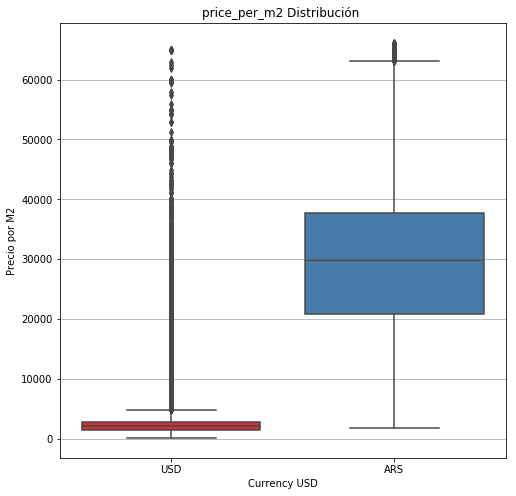

In [151]:
plt.figure(figsize=(8,8))
plt.grid(True)  
ax = sns.boxplot(x="currency", y="price_per_m2", data=data, palette="Set1")
plt.title('price_per_m2 Distribución ')
plt.xlabel('Currency USD')
plt.ylabel('Precio por M2');
plt.savefig('../Images/Price_m2_after.png')

### Verificar Outliers para Columna "price_usd_per_m2"

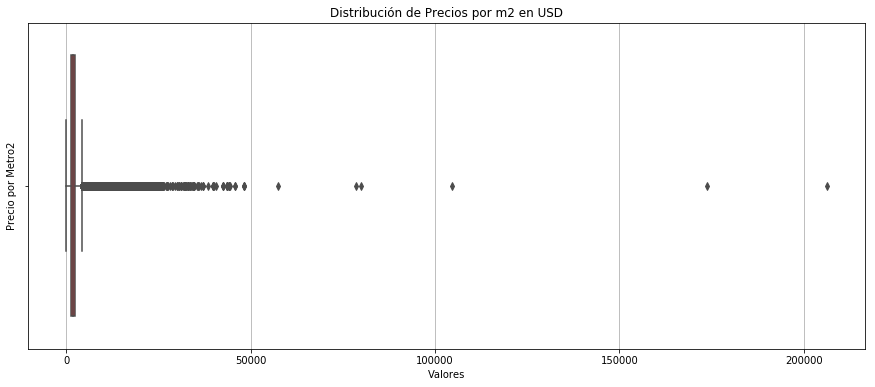

<Figure size 432x288 with 0 Axes>

In [152]:
plt.figure(figsize=(15,6))

plt.grid(True)  
ax=sns.boxplot(x='price_usd_per_m2', data=data, orient='h', palette="Set1") 
plt.title('Distribución de Precios por m2 en USD')
plt.xlabel('Valores')
plt.ylabel('Precio por Metro2')
plt.show()
plt.savefig("../Images/Price_USD_m2-before.png")


In [153]:
calculate_iqr_values(data.loc[data['price_usd_per_m2'].notnull(), "price_usd_per_m2"])

(-683.5679090566625, 4378.311930593971)

In [154]:
min_price2_USD_per_m2 = 150
iqr_values_price_USD=calculate_iqr_values(data.loc[data['price_usd_per_m2'].notnull(), "price_usd_per_m2"])
data.loc[(data['price_usd_per_m2']>iqr_values_price_USD[1])|(data['price_usd_per_m2']<min_price2_USD_per_m2),'price_usd_per_m2']=np.nan

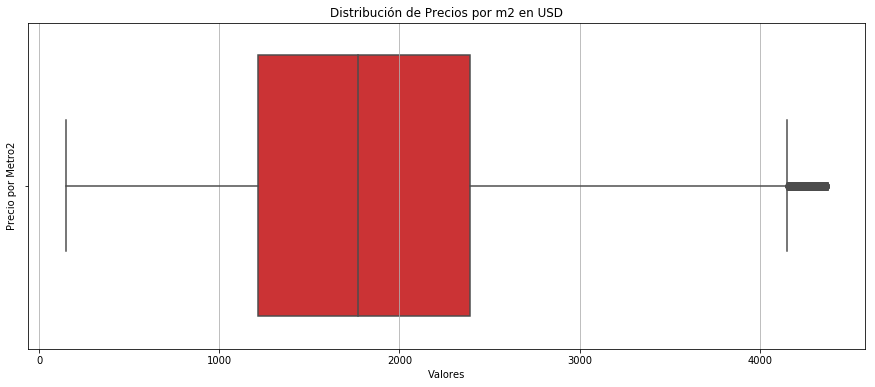

<Figure size 432x288 with 0 Axes>

In [155]:
plt.figure(figsize=(15,6))

plt.grid(True)  
ax=sns.boxplot(x='price_usd_per_m2', data=data, orient='h', palette="Set1") 
plt.title('Distribución de Precios por m2 en USD')
plt.xlabel('Valores')
plt.ylabel('Precio por Metro2')
plt.show()

plt.savefig("../Images/Price_USD_m2-after.png")

##  Usamos regex para buscar los precios faltantes en las columnas "description" y "title"

In [156]:
def price_search(text):
    pattern = r'(?:USD|U\$D|DOLL|DOL.|U\$S|dolares|dólares|precio|precio total)\s?(\d+,?\.?\d*,?\.?\d*)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>35000:
            return max(price_lst)
        else:
            return np.nan
    if price_lst[0]>35000:
        return price_lst[0]
    else:
        return np.nan

In [157]:
data.loc[data['price_aprox_usd'].isna(),'description'].apply(price_search).notnull().sum()

410

In [158]:
data.loc[data['price_aprox_usd'].isna(),'title'].apply(price_search).notnull().sum()

2369

In [159]:
def price_search2(text):
    pattern = r'(\d+,?\.?\d*,?\.?\d*)\s?(?:USD|U\$D|DOLL|DOL.|U\$S|dolares|dólares)+'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>35000:
            return max(price_lst)
        else:
            return np.nan
    if price_lst[0]>35000:
        return price_lst[0]
    else:
        return np.nan

Aplicamos las dos funciones a las dos columnas 

In [160]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    20281
price_aprox_usd               20282
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

In [161]:
data["price_aprox_usd"].fillna(value=data.loc[data['price_aprox_usd'].isna(),'title'].apply(price_search), inplace=True)
data["price_aprox_usd"].fillna(value=data.loc[data['price_aprox_usd'].isna(),'title'].apply(price_search2), inplace=True)
data["price_aprox_usd"].fillna(value=data.loc[data['price_aprox_usd'].isna(),'description'].apply(price_search), inplace=True)
data["price_aprox_usd"].fillna(value=data.loc[data['price_aprox_usd'].isna(),'description'].apply(price_search2), inplace=True)

In [162]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    20281
price_aprox_usd               17722
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

In [163]:
#REVISAR SI ESTA FILA DESAPARECE ANTES

(data.loc[(data['price_aprox_local_currency'].notnull())&(data['currency'].isna())&(data['price'].notnull()),['price','price_aprox_usd','price_aprox_local_currency','currency']])

,price,price_aprox_usd,price_aprox_local_currency,currency
5841,0.0,NaN,0.0,NaN


## Completando los valores expresados en pesos

In [164]:
def price_search_pesos(text):
    pattern =  r'(?:\$)\s?(\d+,?\.?\d*,?\.?\d*)'
    regex = re.compile(pattern, flags = re.IGNORECASE)
    price_lst = regex.findall(text)
    price_lst = [float(item.replace(',','').replace('.','')) for item in price_lst]
    if not price_lst:
        return np.nan
    if len(price_lst)>1:
        if max(price_lst)>20000:
            return max(price_lst)
        else:
            return np.nan
  
    if len(price_lst)==1:
        if price_lst[0]>35000:
            return price_lst[0]
    
        else:
            return np.nan


In [165]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    20281
price_aprox_usd               17722
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

In [166]:
data["price_aprox_local_currency"].fillna(value=data.loc[data['price_aprox_local_currency'].isna(),'title'].apply(price_search_pesos), inplace=True)
data["price_aprox_local_currency"].fillna(value=data.loc[data['price_aprox_local_currency'].isna(),'description'].apply(price_search_pesos), inplace=True)


In [167]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    19867
price_aprox_usd               17722
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

# CÁLCULO DE VALORES FALTANTES CORRESPONDIENTES A VARIABLES ALEATORIAS LINEALMENTE DEPENDIENTES

En el paso anterior se vio, y se hizo una reducción de los tipos de cambio presentes en el dataset. En esa instancia se decidió
trabajar sólo con moneda local (pesos argentinos) y dólar como única divisa.
A continuación, vamos a analizar las variables aleatorias presentes en el dataset, en primer lugar, el peso que se le dá a los metros cubiertos y descubiertos en el precio de la propiedad


In [168]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    19867
price_aprox_usd               17722
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

#### Variables Aleatorias Linealmente Dependientes

Las siguientes columnas, están formadas por variables que son LD unas de otras. Por lo cuál, vamos a recuperar valores
realizando operaciones algebraicas entre ellas

Los datos recuperados en 'price' se calcularán directamente en dólares

In [169]:
data.iloc[1:5,:][['price', 'currency', 'price_aprox_local_currency','price_aprox_usd','surface_total_in_m2', 'price_usd_per_m2', "price_per_m2"]]

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2
1,239000.0,USD,4217035.5,239000.0,NaN,1707.142857,2438.775510
2,53000.0,USD,935158.5,53000.0,28.0,1892.857143,1892.857143
3,245000.0,USD,4322902.5,245000.0,NaN,751.533742,1531.250000
4,165000.0,USD,2911342.5,165000.0,NaN,1100.000000,1100.000000


Partimos con estos datos faltantes

In [170]:
data.iloc[:,10:18].isnull().sum()

price                         20281
currency                      20282
price_aprox_local_currency    19867
price_aprox_usd               17722
surface_total_in_m2           43054
surface_covered_in_m2         42826
price_usd_per_m2              56075
price_per_m2                  34221
dtype: int64

#### Operaciones con Tipo de Cambio

Sabemos que price=price_aprox_usd  cuando "currency"==DOL
y que con ese ingreso la relación entre "price" y "price_aprox_local_currency" es el "TC_comprador" ya calculado

In [171]:
price_new=data.loc[data["price_aprox_usd"].notnull(), "price_aprox_usd"]

data["price"].fillna(value=price_new, inplace=True) 

In [172]:
data["price_aprox_usd"].fillna(value=data.loc[data["price"].notnull(), "price"], inplace=True) 


In [173]:
TC_comprador=((data.loc[data['currency']=='ARS','price_aprox_local_currency'])/(data.loc[data['currency']=='ARS','price_aprox_usd'])).round(decimals=4)
TC_comprador.value_counts()

17.6445    13133
dtype: int64

In [174]:
price_aprox_local_currency_new =data["price"]*17.6445
data["price_aprox_local_currency"].fillna(value=price_aprox_local_currency_new, inplace=True) 


#### Precios por M2

In [175]:
price_usd_per_m2_new=data['price_aprox_usd']/data['surface_total_in_m2']
price_per_m2_new=data['price']/data['surface_covered_in_m2']

data["price_usd_per_m2"].fillna(value=price_usd_per_m2_new, inplace=True) 
data["price_per_m2"].fillna(value=price_per_m2_new, inplace=True) 



#### Cálculo de superficies

Calculamos la superficie a partir de los precios en ambas monedas y el correspondiente por m2

In [176]:
surface_total_in_m2_new= data["price_aprox_usd"]/data['price_usd_per_m2']
surface_covered_in_m2_new= data["price"]/data['price_per_m2']
                                          
data["surface_total_in_m2"].fillna(value=surface_total_in_m2_new, inplace=True)
data["surface_covered_in_m2"].fillna(value=surface_covered_in_m2_new, inplace=True)

# for tipo,limites_tot,limites_cub in zip(property_type,sup_tot_limits,sup_cub_limits):
#     for i in range(len(limites_tot)):       
#         data.loc[(data['property_type']==str(tipo))&(data['surface_total_in_m2']>limites_tot[i][1]),'surface_total_in_m2']=np.nan
#         data.loc[(data['property_type']==str(tipo))&(data['surface_covered_in_m2']>limites_cub[i][1]),'surface_covered_in_m2']=np.nan
#         data.loc[(data['property_type']==str(tipo))&(data['surface_total_in_m2']<limites_tot[i][0]),'surface_total_in_m2']=np.nan
#         data.loc[(data['property_type']==str(tipo))&(data['surface_covered_in_m2']<limites_cub[i][0]),'surface_covered_in_m2']=np.nan

#### Cálculo de los precios (Columnas "price" y "price_aprox_usd"  a partir de los correspondientes precios por m2 

In [177]:
price_aprox_usd_new=data['price_usd_per_m2']*data["surface_total_in_m2"]
data["price_aprox_usd"].fillna(value=price_aprox_usd_new, inplace=True)

In [178]:
price_new=data['price_per_m2']*data["surface_covered_in_m2"]
values_price = {'price': price_new, 'currency': 'USD'}
data["price"].fillna(value=values_price, inplace=True)

#### Cálculo del precio por m2 en pesos a partir del precio y superficie (operación inversa)

In [179]:
price_usd_per_m2_new= data["price_aprox_usd"]/data['surface_total_in_m2']
price_per_m2_new= data["price"]/data['surface_covered_in_m2']

data["price_usd_per_m2"].fillna(value=price_usd_per_m2_new, inplace=True)
data["price_per_m2"].fillna(value=price_per_m2_new, inplace=True) 


# Columna 'expenses'

La columna de expensas tenía más de 100.000 datos faltantes. Se intentó hacer una búsqueda de esos datos, pero sin mucho éxito (no se pudieron recuperar los suficientes). Además, tomando en cuenta que para el modelo de regresión no tiene valor, se decidió dropear toda esta columna.

## Limpieza Final

Eliminar columnas que no servirán para el siguiente desafío (regresión).
Eliminar datos nulos.
Guardar en un csv los datos limpios.

In [180]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'cochera', 'gimnasio',
       'piscina', 'SUM', 'laundry', 'balcon', 'patio', 'construction_index'],
      dtype='object')

In [181]:
data2 = data.copy()

data3 = data2.drop(['geonames_id','lat-lon','lat','lon','expenses','image_thumbnail','construction_index','title','description','properati_url'],axis=1).dropna().copy()

data3.reset_index(inplace=True)

data3.to_csv('../Data/properati_clean.csv')

data3.head()

,index,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,...,price_per_m2,floor,rooms,cochera,gimnasio,piscina,SUM,laundry,balcon,patio
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,62000,USD,1093959.0,...,1550.000000,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,239000,USD,4217035.5,...,2438.775510,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,53000,USD,935158.5,...,1892.857143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,245000,USD,4322902.5,...,1531.250000,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,165000,USD,2911342.5,...,1100.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
data3.shape

(71603, 24)

In [183]:
data3.operation.value_counts()

sell    71603
Name: operation, dtype: int64

In [184]:
data3.currency.value_counts()

USD    63484
ARS     8119
Name: currency, dtype: int64

In [185]:
data3.country_name.value_counts()

Argentina    71603
Name: country_name, dtype: int64